In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import OPTICS
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram

# Task 1 - The Data

In [2]:
raw_data = pd.read_csv("enhanced_anxiety_dataset.csv")

### Explain the dataset

The dataset consists of 19 features describing demographic characteristics, lifestyle habits, physiological health indicators, mental health history, and recent life events. A detailed overview of each feature is provided below:

- **Age**: Age of the individual, ranging from 18 to 64 years
- **Gender**: Gender identity of the individual (Male, Female, or Other)
- **Occupation**: Professional occupation; categorical variable describing the individual's field of work
- **Sleep Hours**: Average number of hours of sleep per night (measured in hours)
- **Physical Activity (hrs/week)**: Total hours of physical exercise per week (continuous)
- **Caffeine Intake (mg/day)**: Average daily caffeine consumption, measured in milligrams
- **Alcohol Consumption (drinks/week)**: Average number of alcoholic drinks consumed per week
- **Smoking**: Indicates whether the individual smokes (Yes or No)
- **Family History of Anxiety**: Indicates the presence of anxiety disorders in the individual's family history (Yes or No)
- **Stress Level (1–10)**: Self-reported stress level on a scale from 1 (low) to 10 (high)
- **Heart Rate (bpm)**: Average resting heart rate, measured in beats per minute
- **Breathing Rate (breaths/min)**: Average breathing rate, measured in breaths per minute
- **Sweating Level (1–5)**: Self-reported tendency to sweat, rated on a scale from 1 (low) to 5 (high)
- **Dizziness**: Indicates whether the individual experiences dizziness (Yes or No)
- **Medication**: Indicates whether the individual is currently taking medication related to mental health (Yes or No)
- **Therapy Sessions (per month)**: Number of therapy sessions attended per month
- **Recent Major Life Event**: Indicates whether the individual experienced a major life event recently (Yes or No)
- **Diet Quality (1–10)**: Self-rated quality of diet on a scale from 1 (poor) to 10 (excellent)
- **Anxiety Level (1–10)**: Self-reported level of social anxiety, rated from 1 (low) to 10 (high); used for validation purposes only  

&nbsp;

The dataset fits both the formal requirements of the portfolio exam and the practical goals of the pitched project for early detection of social anxiety among students.

**For the portfolio exam:**
- The dataset was compiled through anonymous surveys, observational studies, and self-reported health data. The collection process was carefully validated against academic research findings on mental health and anxiety, making it highly realistic and suitable for analyzing student behavior.

- It is not one of the datasets used in the course lectures or exercises and was obtained separately, which fulfills the originality requirement of the exam.

- It includes a wide range of behavioral, lifestyle, and health indicators such as sleep hours, caffeine intake, stress levels, therapy sessions, and heart rate. Most of the features are numerical, which makes the dataset ideal for Principal Component Analysis (PCA) and clustering experiments.

- The dataset has undergone structured cleaning, removing inconsistencies, missing values, and outliers. It is tidy, well-structured, and easy to use for building reproducible experiments.

- All personally identifiable information was removed during data collection, and the dataset is shared under ethical standards, ensuring that it can be used legally without restrictions.

**For the pitched project:**

- The features included are exactly the types of behavioral data that universities can realistically monitor without needing expensive diagnostic tools. This allows for a fast, low-cost approach to identify students at risk of social anxiety.

- The dataset covers mild to severe cases of anxiety. This diversity enables meaningful clustering across the full spectrum of social anxiety experiences among students, making the findings more useful for early intervention strategies.

- The Anxiety Level variable is included separately and will be used only for validating the clustering results, not for building the clusters themselves. This allows for an unbiased evaluation of the discovered student profiles.

- The features in the data are things that can be influenced through university programs or student support (like encouraging better sleep habits or physical activity), which makes the findings actionable in practice.

In summary, the dataset not only fulfills all the technical requirements of the portfolio exam but also directly supports the practical aims of the pitched project. It enables a realistic, actionable, and cost-effective way for Student Services at FH Kiel and CAU to better detect social anxiety risks early and provide targeted support, helping to improve student well-being and retention.

### Task 2: Initial Data Analysis

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

The dataset contains 11,000 entries and 19 columns. There are no missing values in any feature. Numerical features like "Age", "Sleep Hours", and "Heart Rate" are stored as integers or floats, depending on whether they represent discrete or continuous quantities. Categorical features like "Gender" and "Smoking" are currently stored as object types. The data structure appears clean and appropriate for further analysis.

In [4]:
raw_data.describe()

Age   Sleep Hours  Physical Activity (hrs/week)  \
count  11000.000000  11000.000000                  11000.000000   
mean      40.241727      6.650691                      2.942136   
std       13.236140      1.227509                      1.827825   
min       18.000000      2.300000                      0.000000   
25%       29.000000      5.900000                      1.500000   
50%       40.000000      6.700000                      2.800000   
75%       51.000000      7.500000                      4.200000   
max       64.000000     11.300000                     10.100000   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count              11000.000000                       11000.000000   
mean                 286.090000                           9.701636   
std                  144.813157                           5.689713   
min                    0.000000                           0.000000   
25%                  172.000000                           5.000000   
50%                  273.000000                          10.000000   
75%                  382.000000                          15.000000   
max                  599.000000                          19.000000   

       Stress Level (1-10)  Heart Rate (bpm)  Breathing Rate (breaths/min)  \
count         11000.000000      11000.000000                  11000.000000   
mean              5.856364         90.916000                     20.957545   
std               2.927202         17.325721                      5.160107   
min               1.000000         60.000000                     12.000000   
25%               3.000000         76.000000                     17.000000   
50%               6.000000         92.000000                     21.000000   
75%               8.000000        106.000000                     25.000000   
max              10.000000        119.000000                     29.000000   

       Sweating Level (1-5)  Therapy Sessions (per month)  \
count          11000.000000                  11000.000000   
mean               3.080636                      2.427818   
std                1.398877                      2.183106   
min                1.000000                      0.000000   
25%                2.000000                      1.000000   
50%                3.000000                      2.000000   
75%                4.000000                      4.000000   
max                5.000000                     12.000000   

       Diet Quality (1-10)  Anxiety Level (1-10)  
count         11000.000000          11000.000000  
mean              5.181818              3.929364  
std               2.895243              2.122533  
min               1.000000              1.000000  
25%               3.000000              2.000000  
50%               5.000000              4.000000  
75%               8.000000              5.000000  
max              10.000000             10.000000

In [5]:
raw_data.describe(include=["object"])

Gender Occupation Smoking Family History of Anxiety Dizziness  \
count    11000      11000   11000                     11000     11000   
unique       3         13       2                         2         2   
top     Female   Musician     Yes                       Yes       Yes   
freq      3730        892    5779                      5847      5672   

       Medication Recent Major Life Event  
count       11000                   11000  
unique          2                       2  
top           Yes                     Yes  
freq         5666                    5623

The descriptive statistics show that the feature ranges are plausible and match expectations. For example, "Age" ranges from 18 to 64 years, "Sleep Hours" mostly falls between reasonable values like 4 and 10 hours. The variables "Stress Level" and "Anxiety Level" are measured on a 1–10 scale, with average values of 5.81 and 4.15 respectively, indicating that on average, participants reported moderate levels of stress and slightly lower levels of social anxiety. For binary features like "Smoking", "Family History of Anxiety", "Dizziness", "Medication", and "Recent Major Life Event", "No" or "Yes" dominates, depending on the variable.


In [6]:
raw_data.head(5)

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   29  Female     Artist          6.0                           2.7   
1   46   Other      Nurse          6.2                           5.7   
2   64    Male      Other          5.0                           3.7   
3   20  Female  Scientist          5.8                           2.8   
4   49  Female      Other          8.2                           2.3   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       181                                 10     Yes   
1                       200                                  8     Yes   
2                       117                                  4      No   
3                       360                                  6     Yes   
4                       247                                  4     Yes   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                        No                   10               114   
1                       Yes                    1                62   
2                       Yes                    1                91   
3                        No                    4                86   
4                        No                    1                98   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            14                     4        No        Yes   
1                            23                     2       Yes         No   
2                            28                     3        No         No   
3                            17                     3        No         No   
4                            19                     4       Yes        Yes   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             3                     Yes                    7   
1                             2                      No                    8   
2                             1                     Yes                    1   
3                             0                      No                    1   
4                             1                      No                    3   

   Anxiety Level (1-10)  
0                   5.0  
1                   3.0  
2                   1.0  
3                   2.0  
4                   1.0

Previewing the first five rows confirms that the data entries are logically structured and consistent with the dataset description.

### Task 3: Preprocessing

In [7]:
data = raw_data[[
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Sweating Level (1-5)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]].copy()

In [8]:
#standardize data using standard scaler ans safe as df
scaler = StandardScaler()
data = pd.DataFrame(
    scaler.fit_transform(data),
    index=data.index,
    columns=data.columns
)

- Following the assignment requirements, the final dataset for clustering and dimensionality reduction is stored in the variable `data`. It contains only continuous, behavioral, and physiological features. Categorical variables such as "Gender" and "Occupation" were excluded to ensure clean distance-based analysis. The original dataset (`raw_data`) is kept for later cluster interpretation if needed.

- All features were standardized using StandardScaler to ensure equal weighting across different units and scales (necessary for distance-based methods like PCA and clustering)
- StandardScaler centers each feature (mean = 0) and scales to unit variance (std = 1), ensuring equal contribution without distorting the data distribution.


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sleep Hours                        11000 non-null  float64
 1   Physical Activity (hrs/week)       11000 non-null  float64
 2   Caffeine Intake (mg/day)           11000 non-null  float64
 3   Alcohol Consumption (drinks/week)  11000 non-null  float64
 4   Stress Level (1-10)                11000 non-null  float64
 5   Heart Rate (bpm)                   11000 non-null  float64
 6   Breathing Rate (breaths/min)       11000 non-null  float64
 7   Sweating Level (1-5)               11000 non-null  float64
 8   Therapy Sessions (per month)       11000 non-null  float64
 9   Diet Quality (1-10)                11000 non-null  float64
dtypes: float64(10)
memory usage: 859.5 KB


Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
count  1.100000e+04                  1.100000e+04              1.100000e+04   
mean  -9.818409e-17                 -7.492996e-17              1.724681e-16   
std    1.000045e+00                  1.000045e+00              1.000045e+00   
min   -3.544486e+00                 -1.609711e+00             -1.975670e+00   
25%   -6.115841e-01                 -7.890261e-01             -7.878786e-01   
50%    4.017187e-02                 -7.776609e-02             -9.039645e-02   
75%    6.919279e-01                  6.882062e-01              6.623318e-01   
max    3.787769e+00                  3.916232e+00              2.160883e+00   

       Alcohol Consumption (drinks/week)  Stress Level (1-10)  \
count                       1.100000e+04         1.100000e+04   
mean                       -1.111030e-16        -3.035955e-17   
std                         1.000045e+00         1.000045e+00   
min                        -1.705196e+00        -1.659122e+00   
25%                        -8.263774e-01        -9.758444e-01   
50%                         5.244152e-02         4.907174e-02   
75%                         9.312605e-01         7.323491e-01   
max                         1.634316e+00         1.415627e+00   

       Heart Rate (bpm)  Breathing Rate (breaths/min)  Sweating Level (1-5)  \
count      1.100000e+04                  1.100000e+04          1.100000e+04   
mean       1.821573e-16                  2.306034e-16         -1.498599e-16   
std        1.000045e+00                  1.000045e+00          1.000045e+00   
min       -1.784480e+00                 -1.736001e+00         -1.487429e+00   
25%       -8.609557e-01                 -7.669851e-01         -7.725378e-01   
50%        6.256878e-02                  8.227828e-03         -5.764625e-02   
75%        8.706527e-01                  7.834407e-01          6.572453e-01   
max        1.621016e+00                  1.558654e+00          1.372137e+00   

       Therapy Sessions (per month)  Diet Quality (1-10)  
count                  1.100000e+04         1.100000e+04  
mean                   5.748937e-17         3.229740e-17  
std                    1.000045e+00         1.000045e+00  
min                   -1.112144e+00        -1.444441e+00  
25%                   -6.540605e-01        -7.536215e-01  
50%                   -1.959766e-01        -6.280179e-02  
75%                    7.201911e-01         9.734278e-01  
max                    4.384862e+00         1.664248e+00

The final preprocessed dataset `data` contains 11,000 entries and 10 continuous features. There are no missing values, and all variables are numerical and appropriate for dimensionality reduction and clustering. The dataset is clean, and no data instances needed to be excluded.

- After standardization, each feature has a mean of 0 and a variance of 1.
- Due to floating-point precision, the values may not be exactly 0 or 1, but they are very close (e.g., 1e-16).


### Task 4: Exploratory Data Analysis: Statistical Properties

#### Histogram per feature

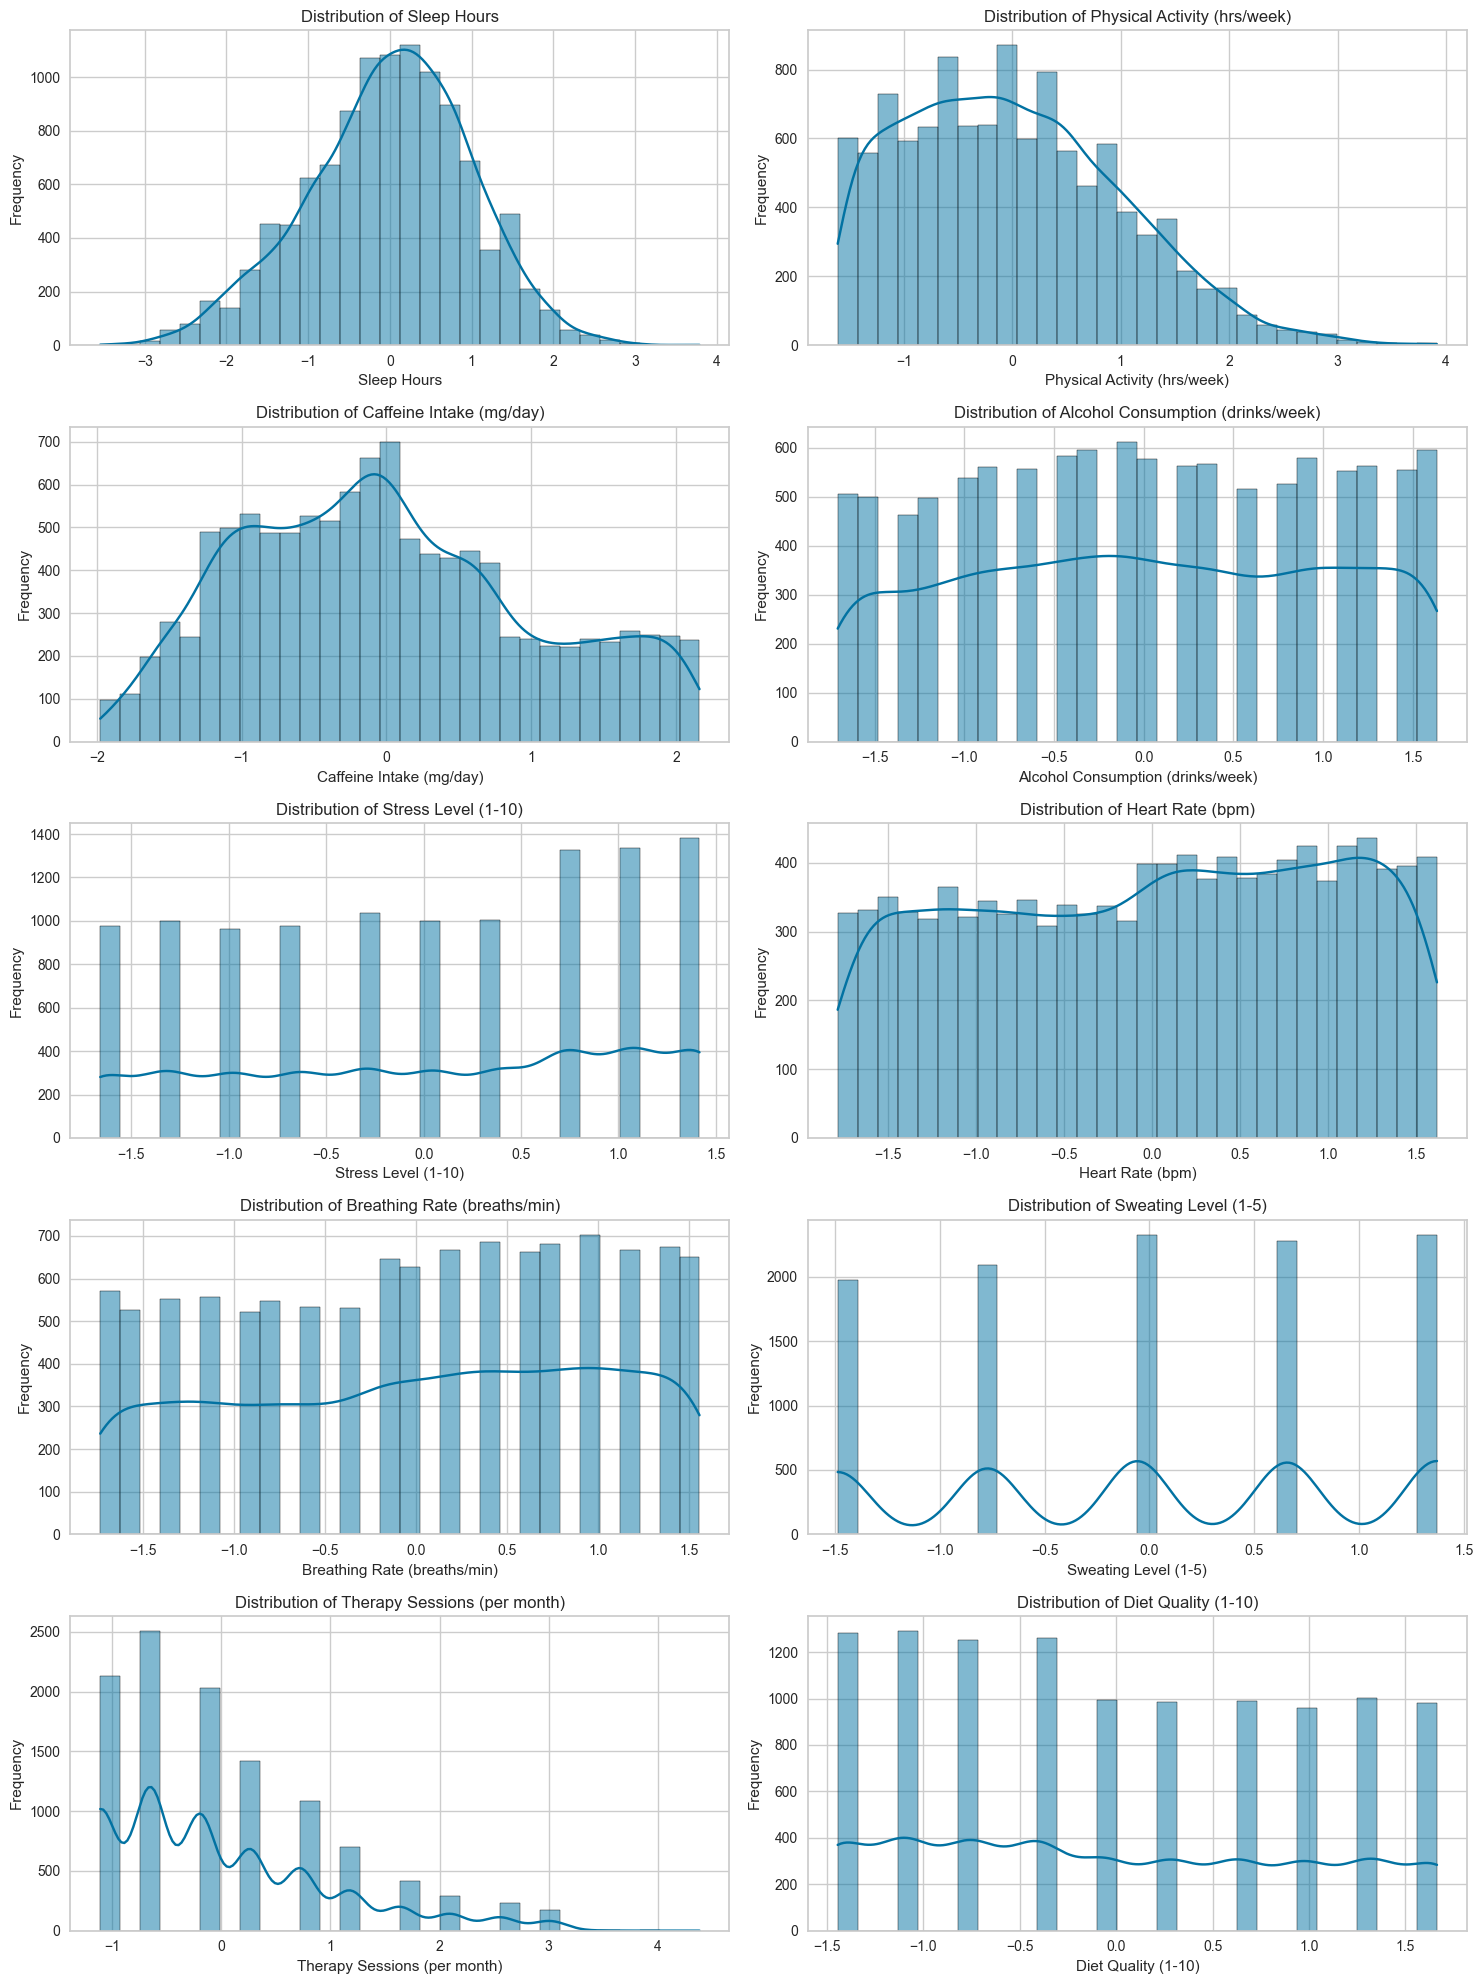

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))  # 5 rows, 2 columns
axes = axes.flatten()

for idx, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- The histograms show that the distributions of the features differ considerably. 
- Behavioral data is very hetereogenous. 

#### Scatterplots with all features

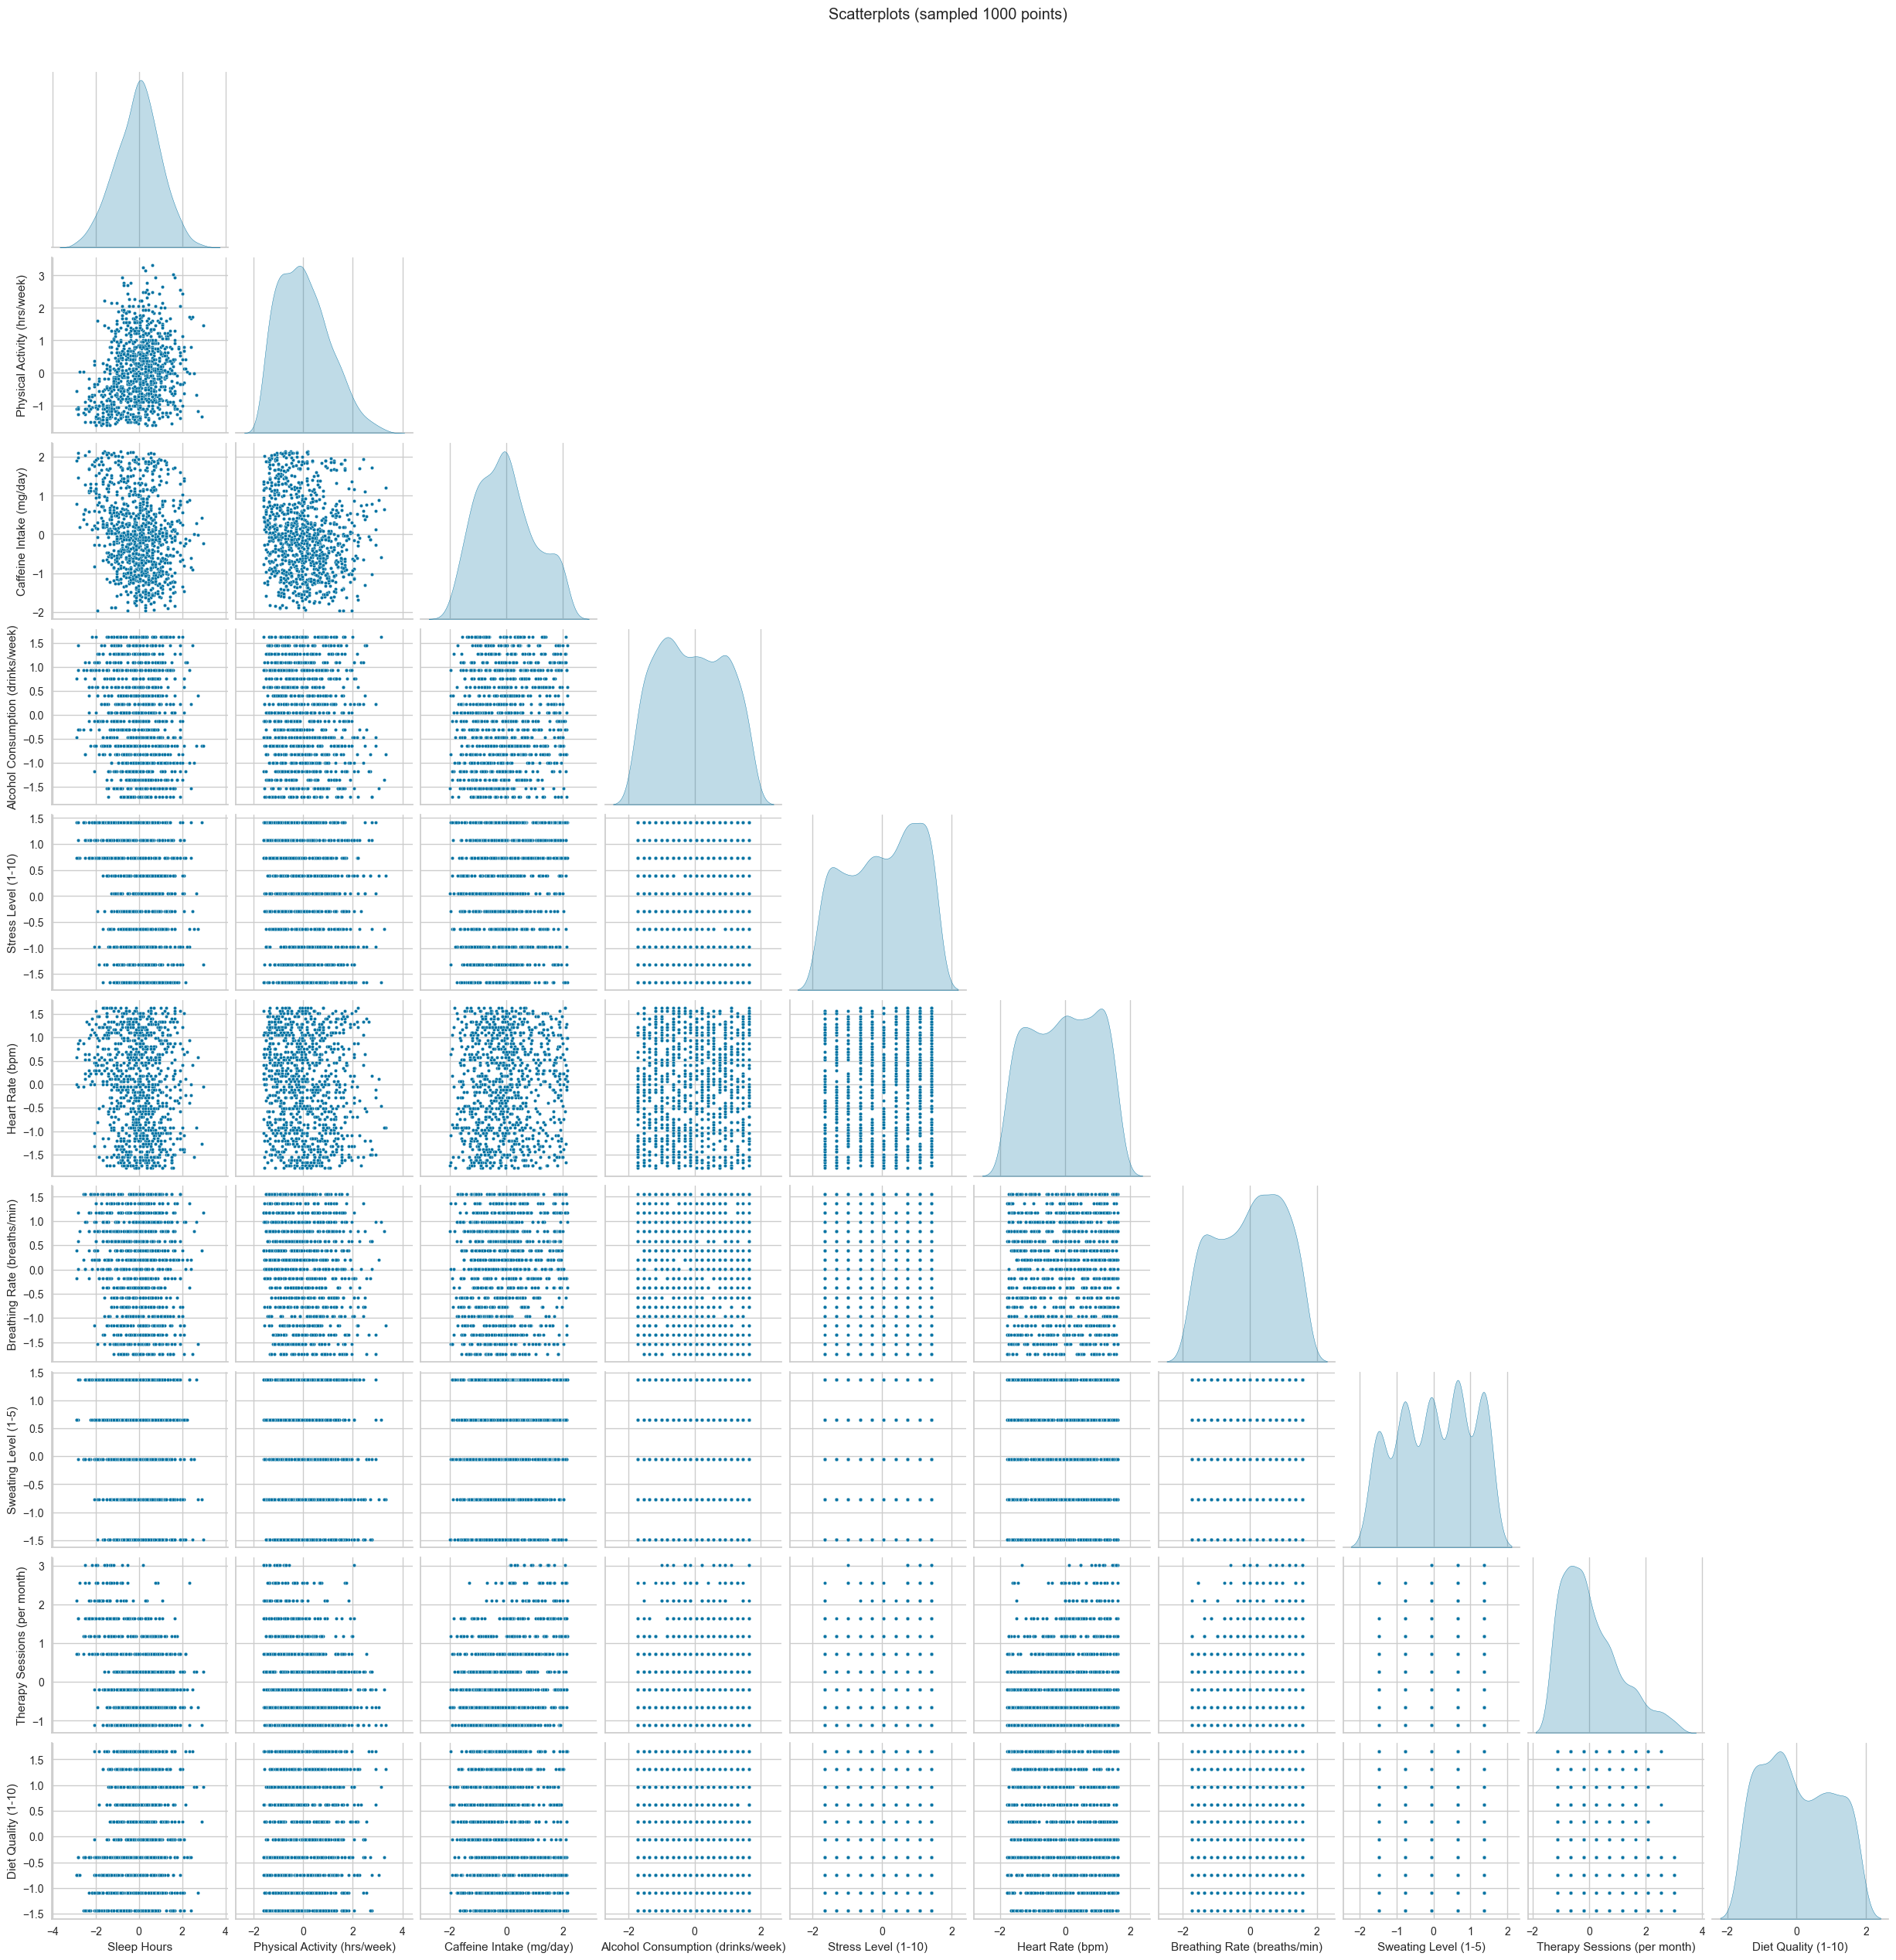

In [11]:
sampled_data = data.sample(1000, random_state=42)
sns.pairplot(sampled_data, corner=True, diag_kind="kde", plot_kws={"s": 10})
plt.suptitle('Scatterplots (sampled 1000 points)', y=1.02)
plt.show()


- To improve visualization, 1000 random samples were selected from the dataset. The resulting pairplot reveals that most feature pairs  show weak or no clear linear relationships. 
- Horizontal and vertical line patterns are visible in several scatterplots, caused by the discrete nature of many features (e.g., Stress Level measured on a 1–10 scale). These discrete steps create artificial-looking structures rather than smooth continuous clouds.
- Overall, the scatterplots suggest a high degree of independence between features, which will likely limit the strength of patterns extracted through PCA and clustering.

#### Correlation Heat Map

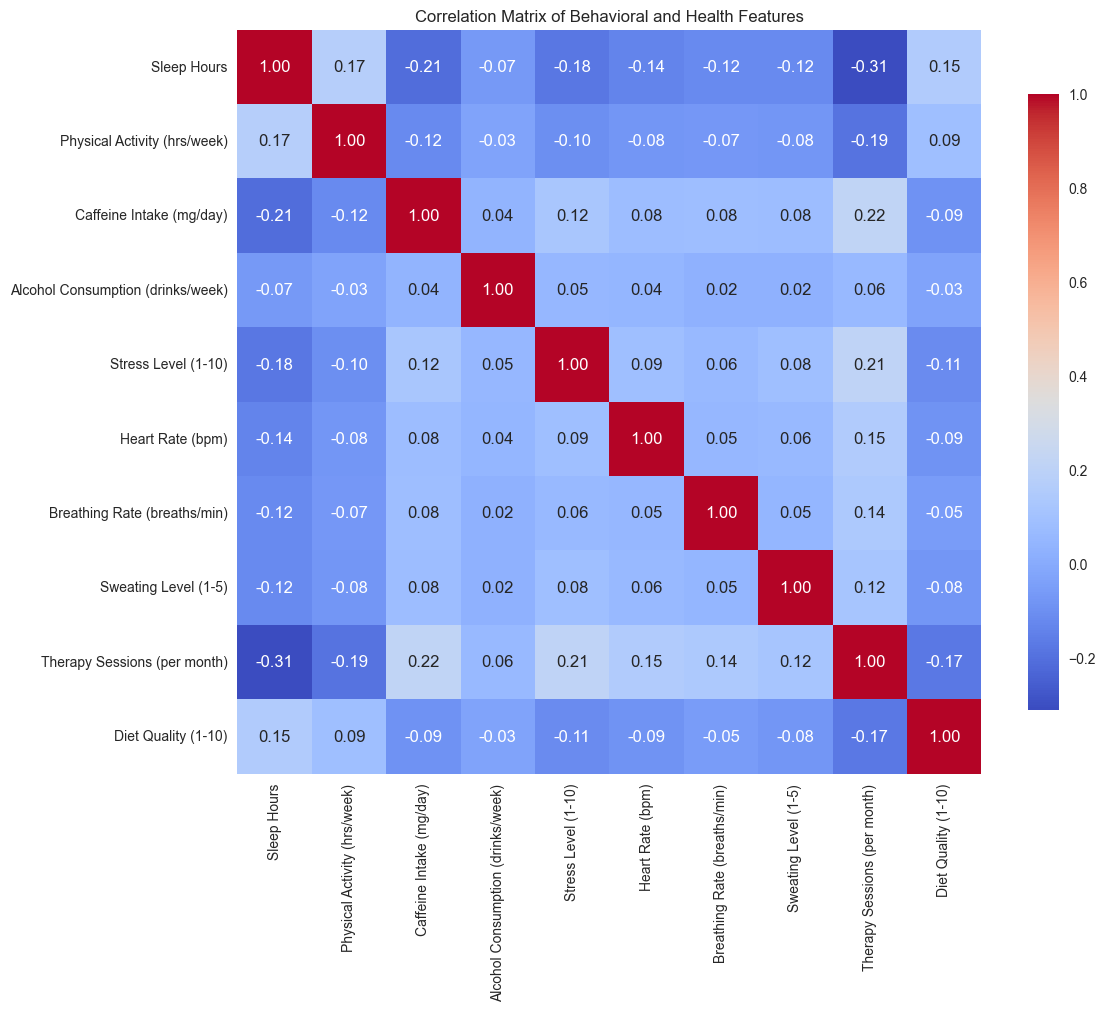

In [12]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    fmt=".2f",        
    cmap="coolwarm",  
    square=True,     
    cbar_kws={"shrink": .8}  
)
plt.title('Correlation Matrix of Behavioral and Health Features')
plt.show()

- Confirming the previous assumptions, the correlation matrix shows that the behavioral and health features are only  weakly correlated, with all Pearson correlation coefficients below 0.31. 
- No feature pairs show strong positive or negative relationships, even in areas where moderate associations could have been expected (e.g., Stress Level and Heart Rate). 
- This independence between features suggests that Principal Component Analysis (PCA) may not uncover dominant components explaining a large proportion of variance. Similarly, clustering may be more difficult due to the lack of natural grouping tendencies in the feature space.


#### Joint Density Plots for largest correlations

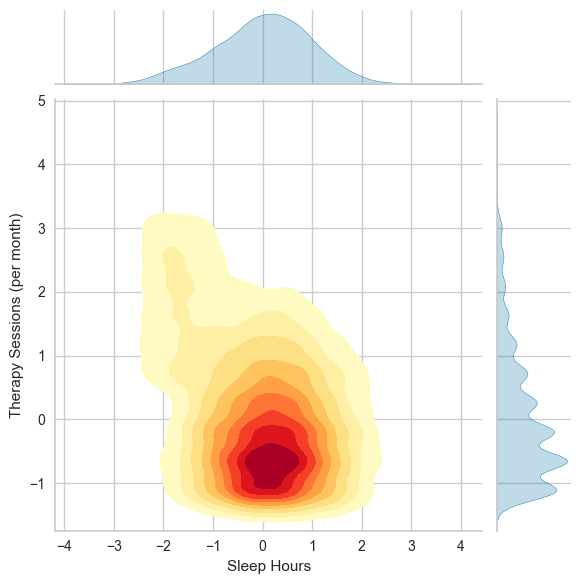

In [13]:
#Sleep Hours vs Therapy Sessions
sns.jointplot(
    data=data,
    x="Sleep Hours",
    y="Therapy Sessions (per month)",
    kind="kde",                 
    fill=True,                  
    cmap="YlOrRd",               
    thresh=0.05                 
)
plt.show()

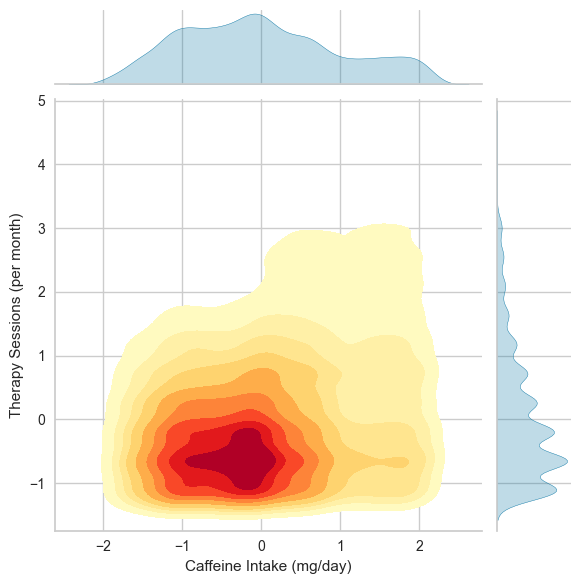

In [14]:
#Caffeine Intake vs. Therapy Sessions
sns.jointplot(
    data=data,
    x="Caffeine Intake (mg/day)",
    y="Therapy Sessions (per month)",
    kind="kde",                 
    fill=True,                  
    cmap="YlOrRd",               
    thresh=0.05                
)
plt.show()


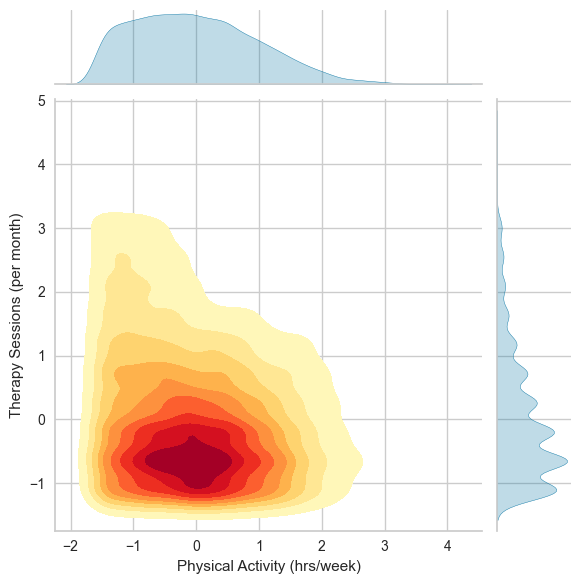

In [15]:
#Physical Activity vs. Therapy Sessions
sns.jointplot(
    data=data,
    x="Physical Activity (hrs/week)",
    y="Therapy Sessions (per month)",
    kind="kde",                
    fill=True,                 
    cmap="YlOrRd",              
    thresh=0.05                
)
plt.show()

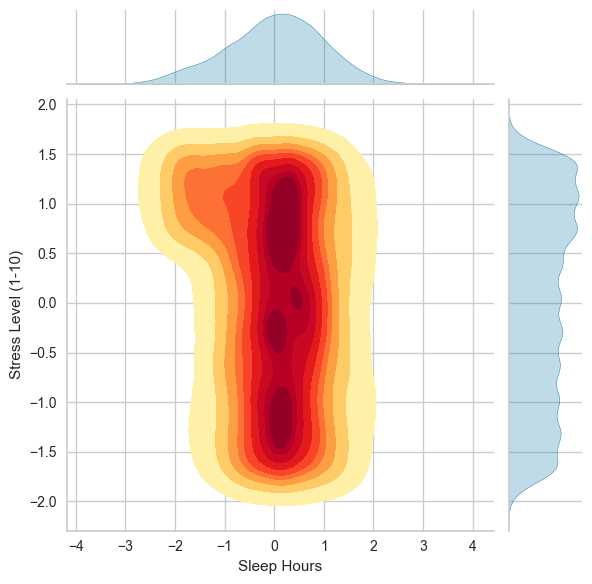

In [16]:
#Sleep Hours vs Stress Level
sns.jointplot(
    data=data,
    x="Sleep Hours",
    y="Stress Level (1-10)",
    kind="kde",                
    fill=True,                  
    cmap="YlOrRd",              
    thresh=0.05                
)
plt.show()

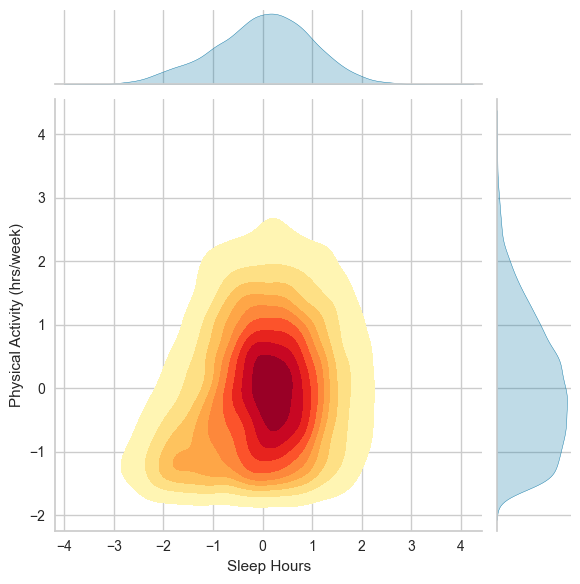

In [17]:
#Sleep Hours vs. Physical Activity
sns.jointplot(
    data=data,
    x="Sleep Hours",
    y="Physical Activity (hrs/week)",
    kind="kde",                 
    fill=True,                 
    cmap="YlOrRd",             
    thresh=0.05                 
)
plt.show()

- circular shapes = independent data
- but some positive or negative trends visible 

#### Boxplots (before and after standardization)

In [18]:
# Extract the numercial features before standardization
data_unscaled = raw_data[[
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Sweating Level (1-5)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]].copy()


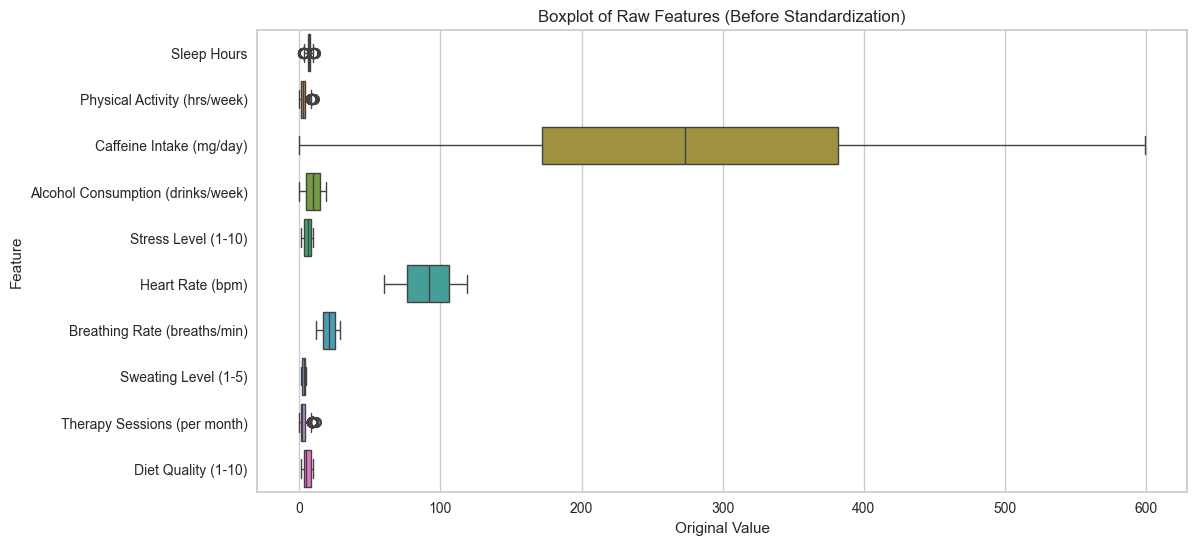

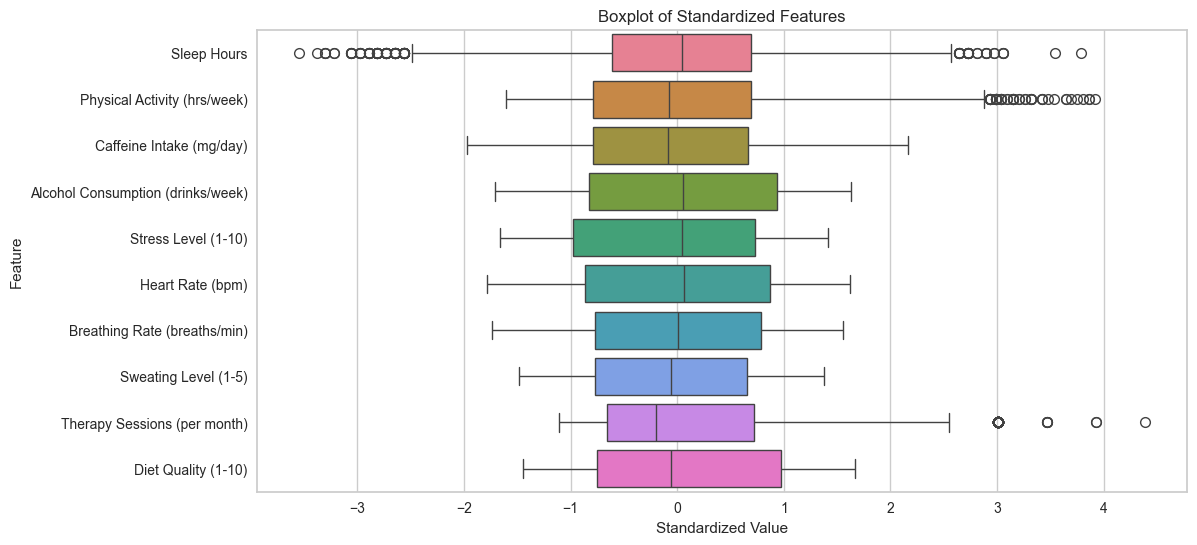

In [19]:
#Boxplot before standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_unscaled, orient='h')
plt.title("Boxplot of Raw Features (Before Standardization)")
plt.xlabel("Original Value")
plt.ylabel("Feature")
plt.show()

#Boxplot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title("Boxplot of Standardized Features")
plt.xlabel("Standardized Value")
plt.ylabel("Feature")
plt.show()

In [20]:
#compare variance before and after scaling
var_before = data_unscaled.var()
var_after = data.var()

#combine into one table
var_comp = pd.DataFrame({
    "Unscaled Variance": var_before,
    "Scaled Variance": var_after
}).round(2)

#sort by unscaled variance
var_comp = var_comp.sort_values("Unscaled Variance", ascending=False)

display(var_comp)


Unscaled Variance  Scaled Variance
Caffeine Intake (mg/day)                    20970.85              1.0
Heart Rate (bpm)                              300.18              1.0
Alcohol Consumption (drinks/week)              32.37              1.0
Breathing Rate (breaths/min)                   26.63              1.0
Stress Level (1-10)                             8.57              1.0
Diet Quality (1-10)                             8.38              1.0
Therapy Sessions (per month)                    4.77              1.0
Physical Activity (hrs/week)                    3.34              1.0
Sweating Level (1-5)                            1.96              1.0
Sleep Hours                                     1.51              1.0

* The boxplot of the unscaled features reveals:
  * substantial differences in scale and spread. "Caffeine Intake (mg/day)" shows the widest range, with values exceeding 600 mg/day and frequent outliers.
  * Features like "Sleep Hours", "Therapy Sessions", and "Physical Activity" have narrower spreads but still include visible outliers.
  * Ordinal features such as "Stress Level (1–10)", "Sweating Level (1–5)", and "Diet Quality (1–10)" appear tightly clustered, reflecting their bounded and discrete nature.
  * These differences in spread are due to the original measurement units, not the importance of the features.

* After standardization, the boxplot shows that:
  * All features are centered around zero and exhibit similar spread.
  * Variance across features is now approximately 1, confirming that scaling was successful.
  * Outliers remain in some variables (e.g., "Alcohol Consumption") but are now shown on a standardized scale.

* The variance table confirms these findings:
  * Before scaling, "Caffeine Intake" had the highest variance (~20,971), followed by "Heart Rate" (~300) and "Alcohol Consumption" (~32).
  * In contrast, "Sweating Level" (~1.96) and "Sleep Hours" (~1.51) showed the least variance.
  * This wide variance range would cause high-scale features to dominate distance and variance-based methods.

* This comparison highlights the necessity of standardization:
  * Without it, high-variance features would overpower PCA and clustering results.
  * Scaling ensures that all features contribute equally, enabling more meaningful and interpretable analysis in the next tasks.


#### Skewness Analysis

In [21]:
data.skew().sort_values()

Sleep Hours                         -0.224472
Stress Level (1-10)                 -0.160872
Breathing Rate (breaths/min)        -0.141205
Heart Rate (bpm)                    -0.119204
Sweating Level (1-5)                -0.073929
Alcohol Consumption (drinks/week)   -0.023334
Diet Quality (1-10)                  0.161948
Caffeine Intake (mg/day)             0.323941
Physical Activity (hrs/week)         0.507010
Therapy Sessions (per month)         1.035117
dtype: float64

- the skewness of each feature was calculated to assess distribution symmetry
- most features were relativly symmetric (-0.5; 0.5)
- as expected, activity and therapy sessions were right-skewed 

#### Outlier Analysis

In [22]:
outlier_summary = {}

for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower) | (data[column] > upper)).sum()
    outlier_summary[column] = outliers

print(outlier_summary)


{'Sleep Hours': np.int64(110), 'Physical Activity (hrs/week)': np.int64(56), 'Caffeine Intake (mg/day)': np.int64(0), 'Alcohol Consumption (drinks/week)': np.int64(0), 'Stress Level (1-10)': np.int64(0), 'Heart Rate (bpm)': np.int64(0), 'Breathing Rate (breaths/min)': np.int64(0), 'Sweating Level (1-5)': np.int64(0), 'Therapy Sessions (per month)': np.int64(178), 'Diet Quality (1-10)': np.int64(0)}


- most features exhibit no outliers (defined as being outside the IQR)
- physical activity, caffeine intake and therapy sessions show a moderate amount of outliers
- no action needed

### Task 5: Dimensionality Reduction

#### Covariance matrix of the standardized features

In [23]:
data.cov().round(2)

Sleep Hours  Physical Activity (hrs/week)  \
Sleep Hours                               1.00                          0.17   
Physical Activity (hrs/week)              0.17                          1.00   
Caffeine Intake (mg/day)                 -0.21                         -0.12   
Alcohol Consumption (drinks/week)        -0.07                         -0.03   
Stress Level (1-10)                      -0.18                         -0.10   
Heart Rate (bpm)                         -0.14                         -0.08   
Breathing Rate (breaths/min)             -0.12                         -0.07   
Sweating Level (1-5)                     -0.12                         -0.08   
Therapy Sessions (per month)             -0.31                         -0.19   
Diet Quality (1-10)                       0.15                          0.09   

                                   Caffeine Intake (mg/day)  \
Sleep Hours                                           -0.21   
Physical Activity (hrs/week)                          -0.12   
Caffeine Intake (mg/day)                               1.00   
Alcohol Consumption (drinks/week)                      0.04   
Stress Level (1-10)                                    0.12   
Heart Rate (bpm)                                       0.08   
Breathing Rate (breaths/min)                           0.08   
Sweating Level (1-5)                                   0.08   
Therapy Sessions (per month)                           0.22   
Diet Quality (1-10)                                   -0.09   

                                   Alcohol Consumption (drinks/week)  \
Sleep Hours                                                    -0.07   
Physical Activity (hrs/week)                                   -0.03   
Caffeine Intake (mg/day)                                        0.04   
Alcohol Consumption (drinks/week)                               1.00   
Stress Level (1-10)                                             0.05   
Heart Rate (bpm)                                                0.04   
Breathing Rate (breaths/min)                                    0.02   
Sweating Level (1-5)                                            0.02   
Therapy Sessions (per month)                                    0.06   
Diet Quality (1-10)                                            -0.03   

                                   Stress Level (1-10)  Heart Rate (bpm)  \
Sleep Hours                                      -0.18             -0.14   
Physical Activity (hrs/week)                     -0.10             -0.08   
Caffeine Intake (mg/day)                          0.12              0.08   
Alcohol Consumption (drinks/week)                 0.05              0.04   
Stress Level (1-10)                               1.00              0.09   
Heart Rate (bpm)                                  0.09              1.00   
Breathing Rate (breaths/min)                      0.06              0.05   
Sweating Level (1-5)                              0.08              0.06   
Therapy Sessions (per month)                      0.21              0.15   
Diet Quality (1-10)                              -0.11             -0.09   

                                   Breathing Rate (breaths/min)  \
Sleep Hours                                               -0.12   
Physical Activity (hrs/week)                              -0.07   
Caffeine Intake (mg/day)                                   0.08   
Alcohol Consumption (drinks/week)                          0.02   
Stress Level (1-10)                                        0.06   
Heart Rate (bpm)                                           0.05   
Breathing Rate (breaths/min)                               1.00   
Sweating Level (1-5)                                       0.05   
Therapy Sessions (per month)                               0.14   
Diet Quality (1-10)                                       -0.05   

                                   Sweating Level (1-5)  \
Sleep Hours                      

- features are correlated (even if weakly) 
- they can be reduced to a smaller dimension (<10)

#### Fitting first PCA model

Principal Component Analysis (PCA) was fitted to the standardized dataset `data`. The resulting transformed dataset `data_pca` contains the principal components as new uncorrelated features, capturing the main variance directions in the data.

In [24]:
pca_model=PCA() 
pca_transformed=pca_model.fit_transform(data)
data_pca=pd.DataFrame(pca_transformed, index=data.index)
data_pca.round(2)

0     1     2     3     4     5     6     7     8     9
0      0.64  0.66 -1.60 -0.31  0.16  1.13  0.64  1.36 -0.47 -0.17
1     -1.97 -0.41  1.32  0.40 -0.25 -0.61  0.37 -0.87 -1.70  0.07
2     -0.20 -1.16  0.35  0.41  1.74 -1.11 -1.27 -0.94 -1.28 -1.19
3     -0.15 -0.64 -0.94 -0.54 -0.26 -0.67 -0.61 -1.20  0.11 -1.28
4     -1.14 -0.94 -0.97  0.35  0.81  0.38 -1.17 -1.07  0.77  0.34
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
10995  0.93 -0.40  1.56 -1.18 -0.01 -1.01  0.73 -0.52  1.26 -1.14
10996 -0.72  1.68 -0.48  0.16  0.12  0.22 -0.08  1.02 -0.81 -0.02
10997 -1.74  1.28  0.12 -0.85 -0.57 -1.30  1.44  0.68 -1.16  0.11
10998  0.66 -0.35  0.36  0.05  1.84 -0.27 -0.73 -0.50  0.08 -1.11
10999 -1.29  0.10 -0.11  0.09 -1.73  1.04 -1.35 -0.69 -1.31  0.01

[11000 rows x 10 columns]

Covariance matrix of the new features (principal components)

In [25]:
data_pca.cov().round(2)

0     1     2     3     4     5     6     7     8     9
0  2.05 -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00
1 -0.00  0.99 -0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00
2  0.00 -0.00  0.96 -0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00
3  0.00 -0.00 -0.00  0.94  0.00 -0.00  0.00 -0.00  0.00  0.00
4 -0.00  0.00  0.00  0.00  0.93  0.00  0.00  0.00  0.00 -0.00
5  0.00 -0.00 -0.00 -0.00  0.00  0.91 -0.00 -0.00  0.00  0.00
6 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.89 -0.00 -0.00  0.00
7 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.87 -0.00 -0.00
8  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  0.77  0.00
9 -0.00  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.68

- The covariance matrix of the PCA-transformed data `data_pca` was calculated. 
- The diagonal entries represent the variance captured by each principal component.
- The off-diagonal entries are close to zero, confirming that the principal components are uncorrelated

Explained Variance by new components

[0.20471159 0.09903767 0.09646176 0.09390224 0.09341638 0.09105685
 0.08914206 0.08721198 0.07661227 0.06844721]
[0.20471159 0.30374926 0.40021102 0.49411326 0.58752963 0.67858648
 0.76772854 0.85494052 0.93155279 1.        ]


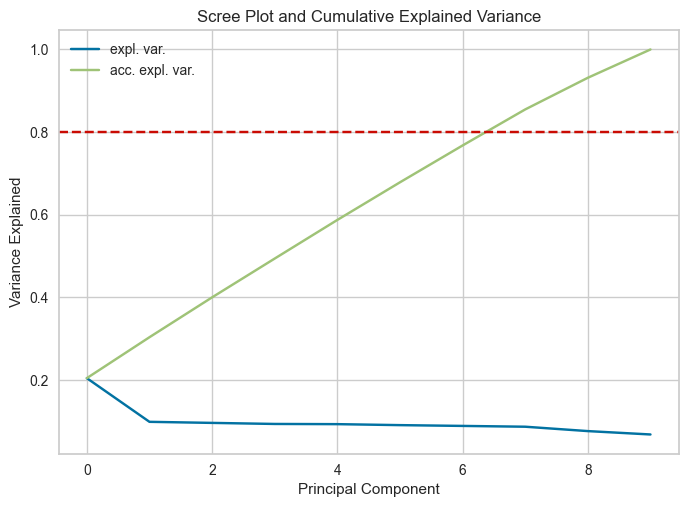

In [26]:
expl_var=pca_model.explained_variance_ratio_
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()

print(expl_var)
print(np.add.accumulate(expl_var))

- The explained variance ratio (`expl_var`) for each principal component was calculated.
- A scree plot was created to visualize the individual variance explained by each principal component.
- A cumulative explained variance curve was added to visualize how much total variance is captured as more components are included.
- A red horizontal line was drawn at the 80% cumulative variance level to guide component selection.
- The printed values of `expl_var` show how much variance each component individually explains.
- The printed cumulative values (`np.add.accumulate(expl_var)`) show how much variance is captured by adding components.
- Although the scree plot shows an "elbow" after the first principal component, PC1 alone explains only approximately 20% of the total variance. 
- Therefore, more components are needed to preserve sufficient information. 
- Based on the cumulative explained variance, 8 principal components were selected to capture at least 80% of the total variance




#### Final PCA Model (with 8 components explaining over 80% of the variance)

In [27]:
model = pca(n_components=0.8, verbose=True)
pca_result = model.fit_transform(data)

In [28]:
data_pca = pca_result['PC']

- converted `results_pca` into a dataframe of the components called `data_pca`

Cumulative Explained variance

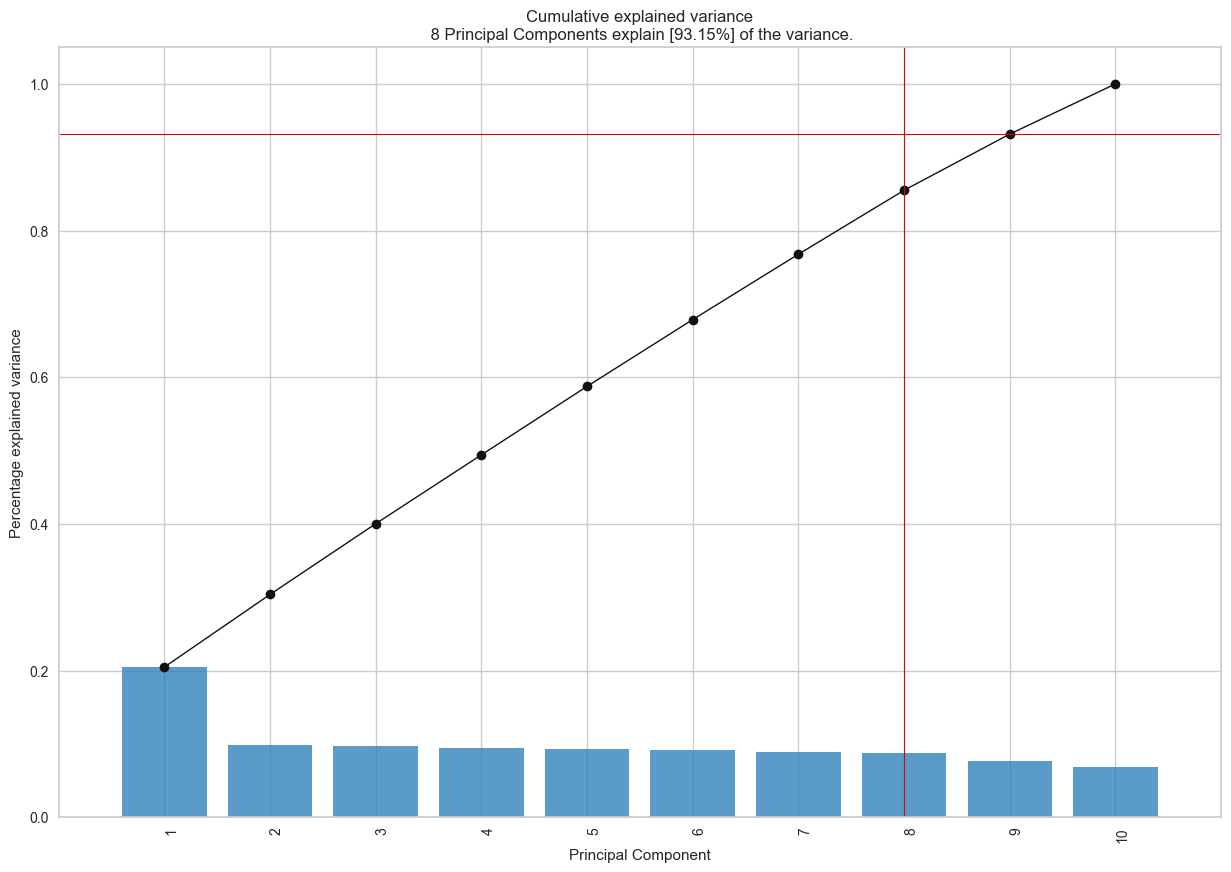

In [29]:
fig, ax = model.plot()

Scatterplot of the first 2 components

[16-05-2025 14:41:36] [scatterd.scatterd] [INFO] Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


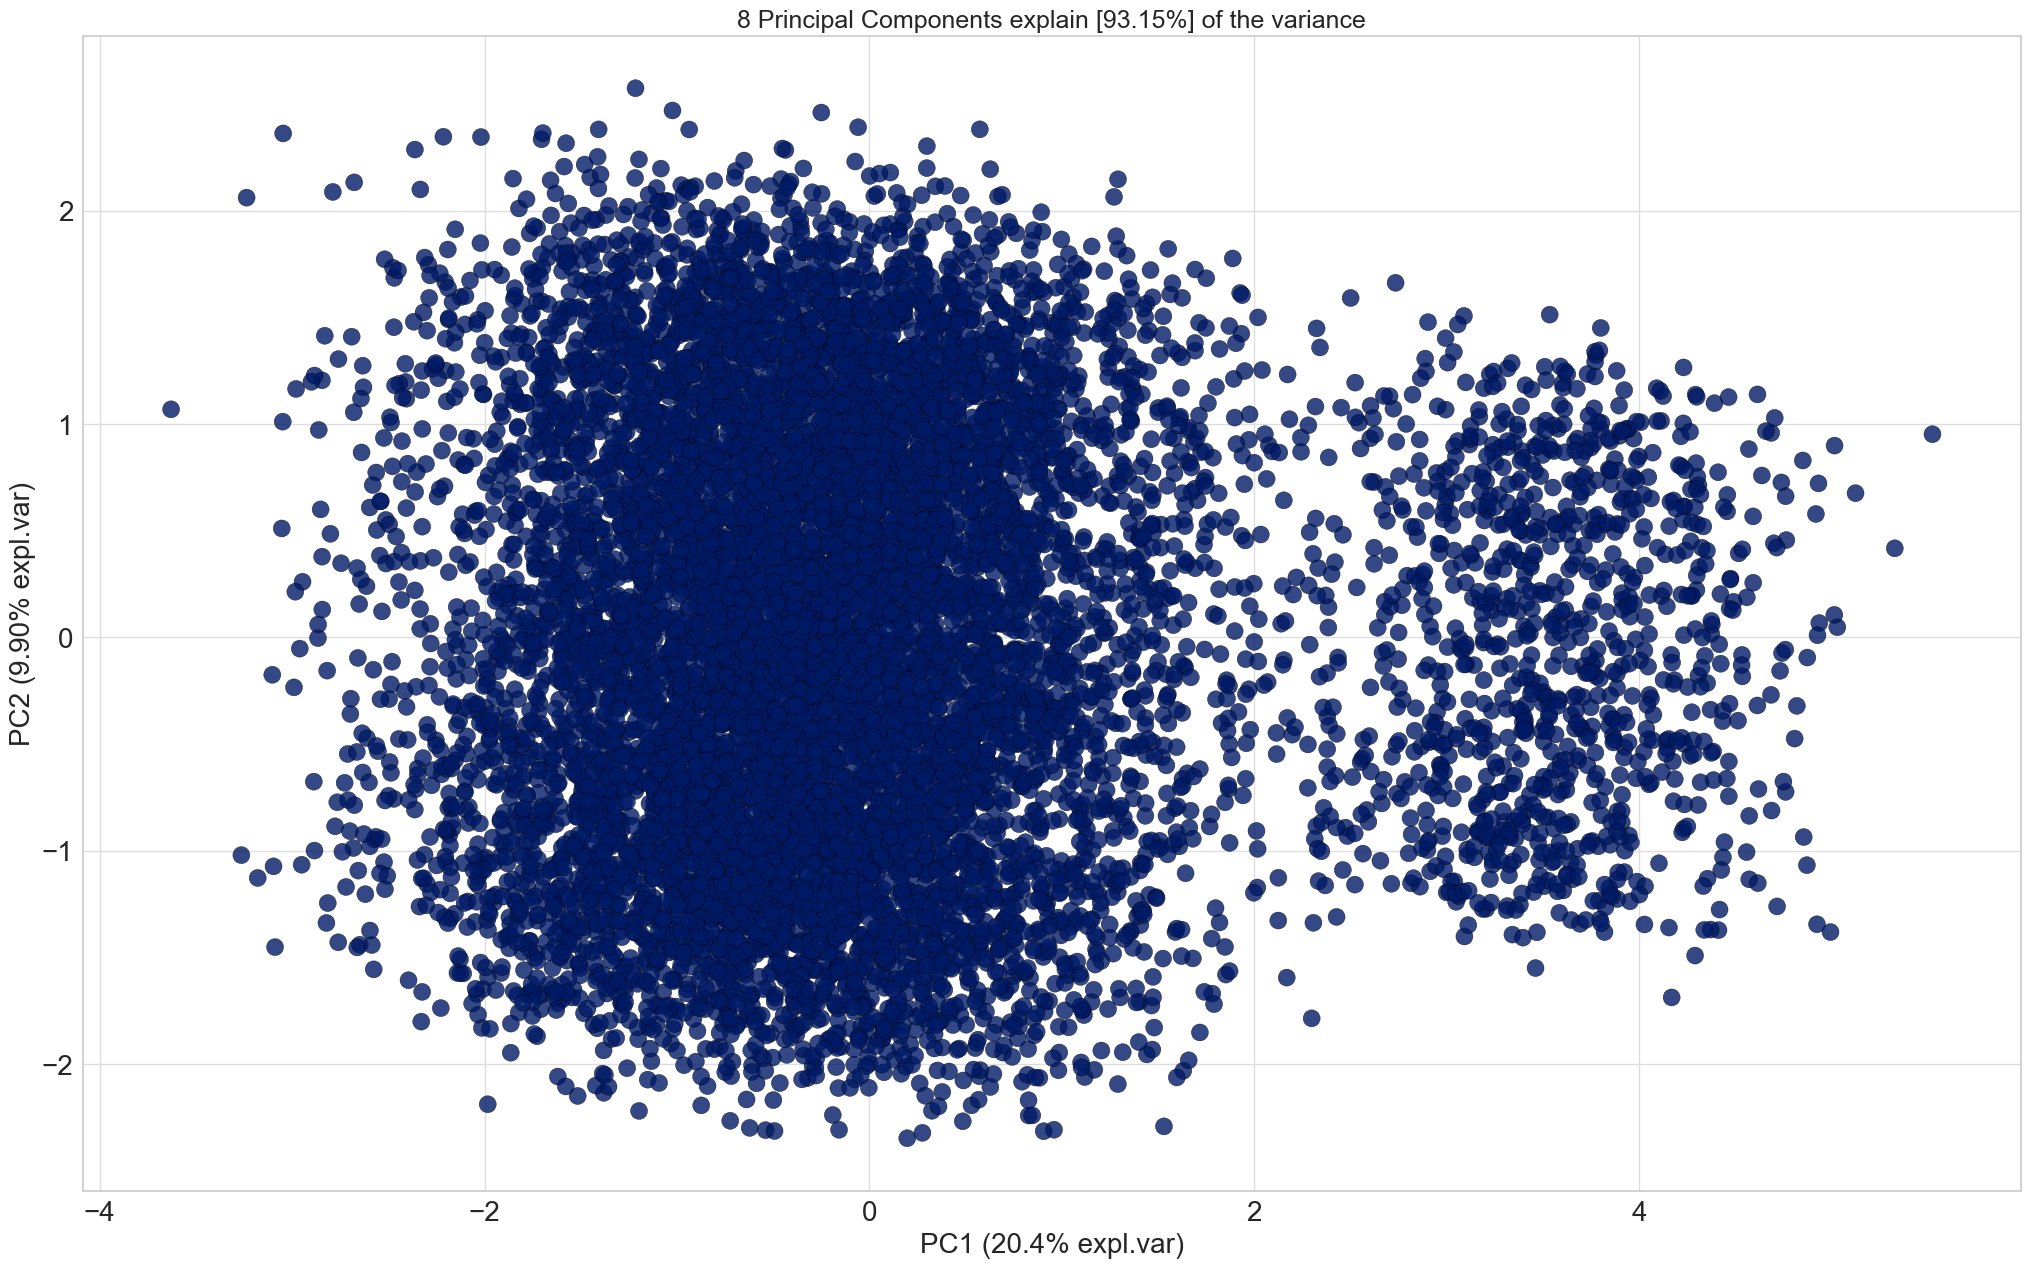

In [30]:
fig, ax = model.scatter(legend=False)
plt.show()

Biplot showing data points and feature loadings

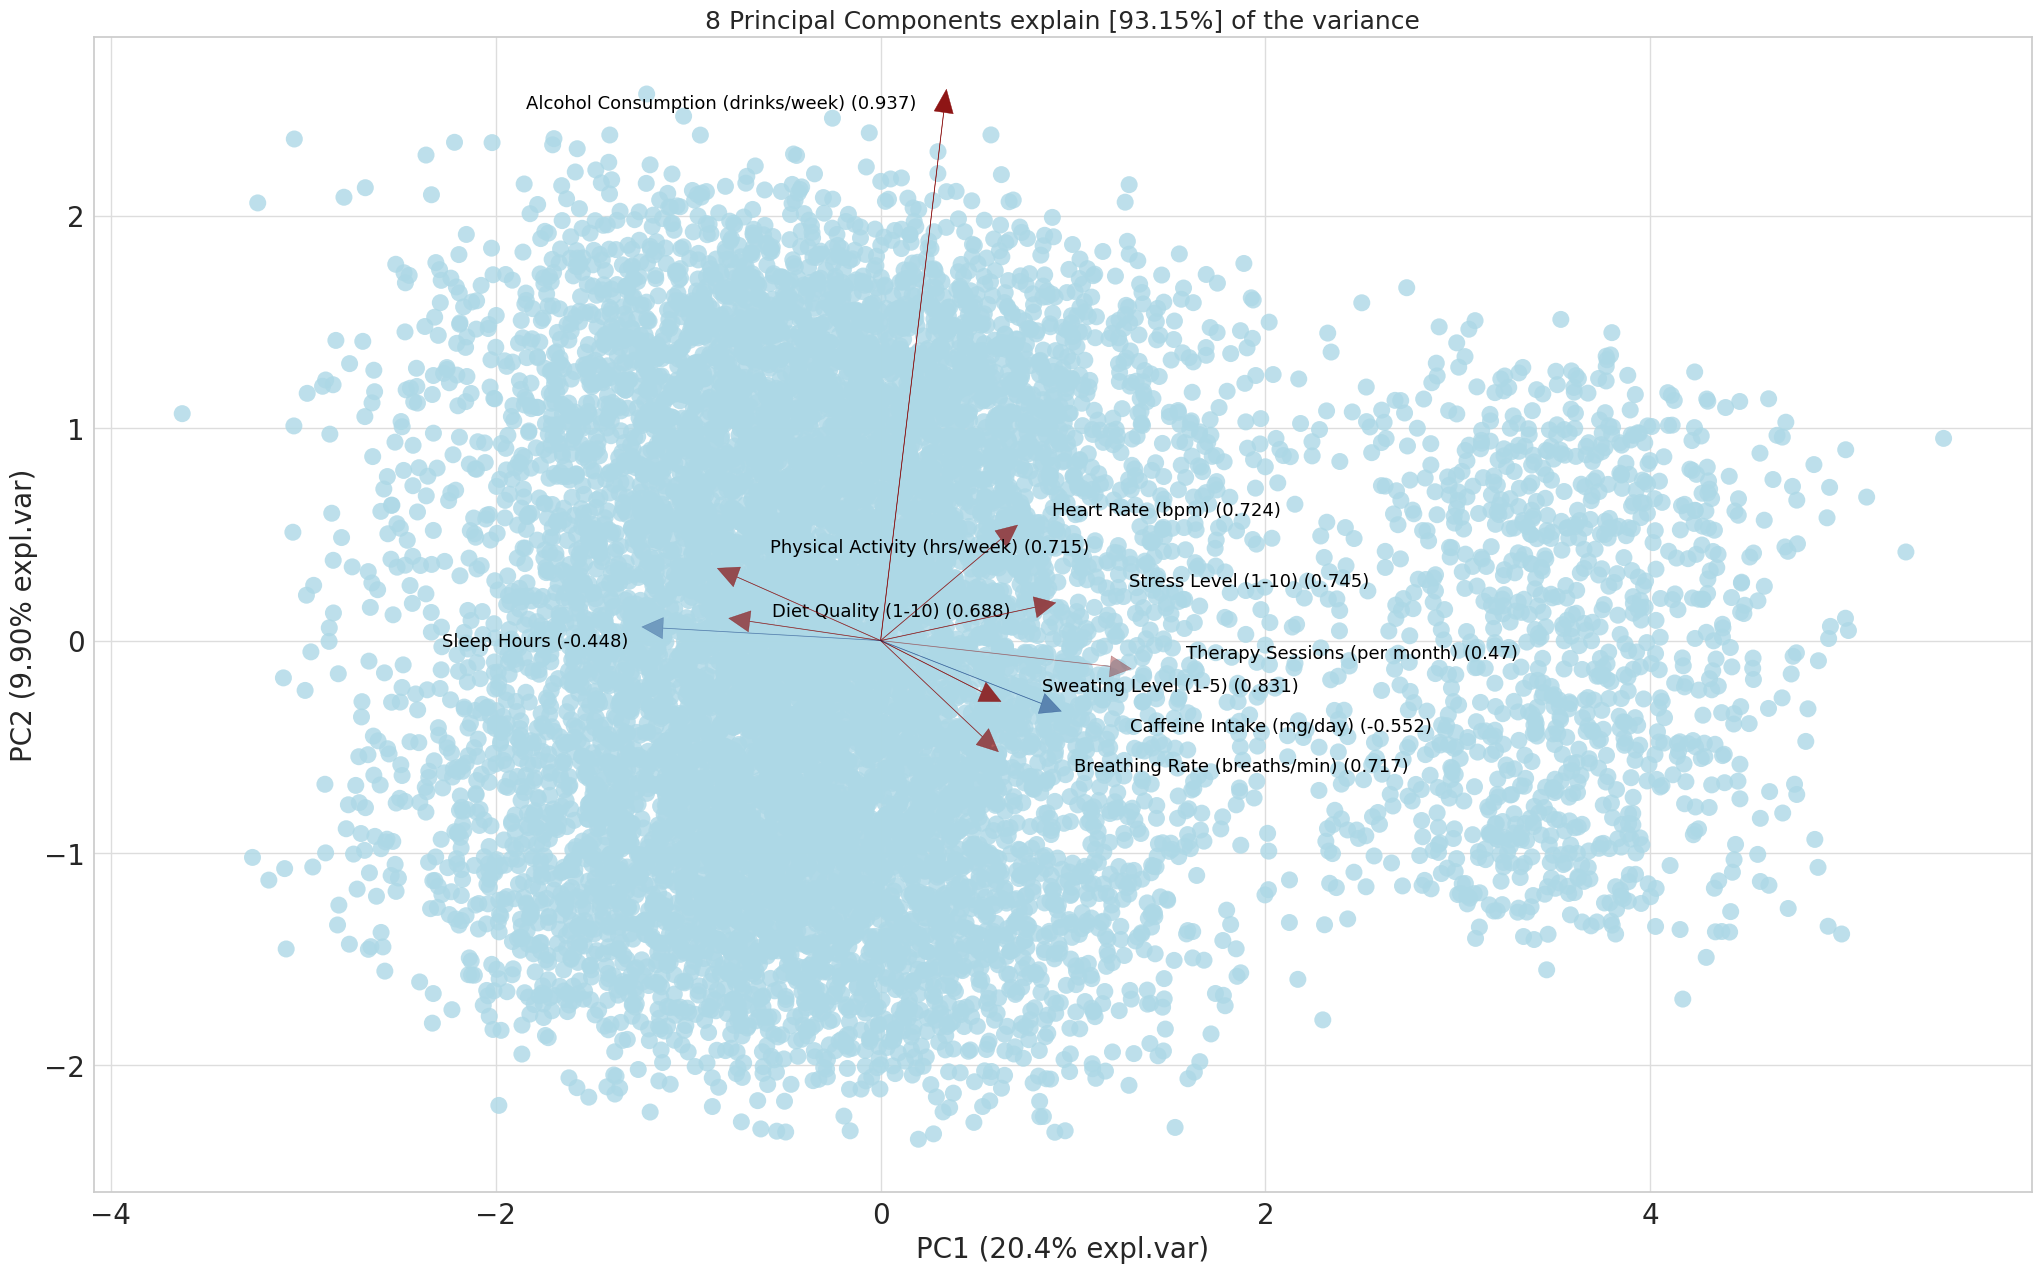

In [31]:
fig, ax = model.biplot(n_feat=10, legend=False)

for collection in ax.collections:
    collection.set_facecolor('lightblue')
    collection.set_edgecolor('none')

for text in ax.texts:
    text.set_fontsize(13)        
    text.set_color('black') 

plt.show()

- A biplot was created based on the first two principal components, visualizing both the PCA-transformed data points and the feature loadings.
- Data points were colored light blue for clarity, and feature labels were set to black with increased font size to improve readability.
- Arrows represent the contribution (loadings) of original features onto the principal components.
- Longer arrows indicate features that contribute more strongly to the principal components, such as Alcohol Consumption and Therapy Sessions.
- The direction of each arrow shows how the feature aligns with the principal component axes.
- Features pointing in similar directions are positively correlated (e.g., Heart Rate and Stress Level), while features pointing in opposite directions are negatively correlated in the PCA space (e.g., Physical Activity and Caffeine Intake).

### Task 6: Clustering

#### k-means on (`data`)

run kmeans with different k

In [33]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=20,
        random_state=1
    )
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

print silhouette scores for different k

In [34]:
k_sil_scores = pd.DataFrame({
    "k": list(k_range),
    "silhouette_score": silhouette_scores
})

print(k_sil_scores)

    k  silhouette_score
0   2          0.185834
1   3          0.112748
2   4          0.105976
3   5          0.108170
4   6          0.106758
5   7          0.107444
6   8          0.106026
7   9          0.105633
8  10          0.106371


plot silhouette scores

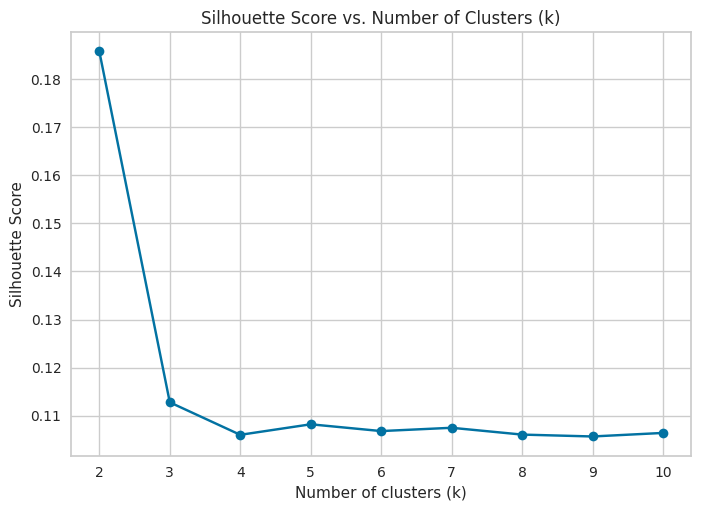

In [36]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Silhouette plot

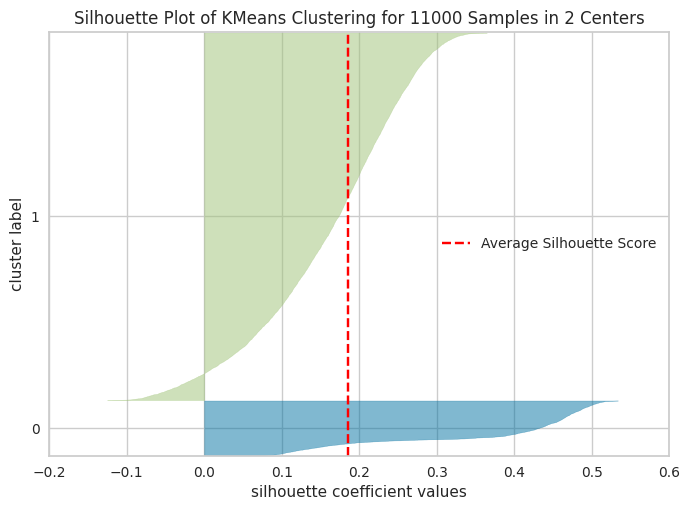

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
k_means_2 = KMeans(n_clusters=2, 
                   init='k-means++',
                   n_init=20,
                   random_state=1)

visualizer = SilhouetteVisualizer(k_means_2, colors='yellowbrick')

visualizer.fit(data)
visualizer.show()

- silhouette score for k = 2 is the highest
- strong decrease of scores afterwards
- k = 2 has a silouette score of 0.19 > "no structure" by convention
- silhouette plot: 
    - cluster 1 is larger than 2
    - overall score is low
    - cluster 0 seems to have a somewhat better clustering structure
    - cluster 1 has very low silhouette scores and even few negative ones
    - it seems to be that the boundary between clusters is fuzzy

vary n_init

In [44]:
n_init_values = [1, 5, 10, 20, 50, 100]
silhouette_scores = []

for n_init in n_init_values:
    kmeans = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=n_init,
        random_state=1
    )
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)
    print(f"n_init = {n_init}: Silhouette Score = {score:.4f}")

n_init = 1: Silhouette Score = 0.1858
n_init = 5: Silhouette Score = 0.1858
n_init = 10: Silhouette Score = 0.1858
n_init = 20: Silhouette Score = 0.1858
n_init = 50: Silhouette Score = 0.1858
n_init = 100: Silhouette Score = 0.1858


change max_iter and algorithm

In [39]:
kmeans = KMeans(
    n_clusters=k,
    init='k-means++',
    n_init=50,          
    max_iter=500,       
    algorithm='elkan', 
    random_state=1
)
labels = kmeans.fit_predict(data)
score = silhouette_score(data, labels)
silhouette_scores.append(score)

silhouette_scores

[np.float64(0.18583375207748087),
 np.float64(0.18583375207748087),
 np.float64(0.18583375207748087),
 np.float64(0.18583375207748087),
 np.float64(0.18583375207748087),
 np.float64(0.18583375207748087),
 np.float64(0.10575012786936744)]

- using different kmeans arguments (e.g. more numbers of init, higher max of iter, different algorithm) did not lead to better results

#### k-means on (`data_pca`)

kmeans for different k

In [40]:
silhouette_scores_pca = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=20,
        algorithm='elkan',
        random_state=1
    )
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    silhouette_scores_pca.append(score)

print silhouette scores

In [41]:
k_sil_scores_pca = pd.DataFrame({
    "k": list(k_range),
    "silhouette_score": silhouette_scores_pca
})

print(k_sil_scores_pca)

    k  silhouette_score
0   2          0.210492
1   3          0.130532
2   4          0.124101
3   5          0.125815
4   6          0.127065
5   7          0.125629
6   8          0.126780
7   9          0.128107
8  10          0.127902


plot silhouette scores

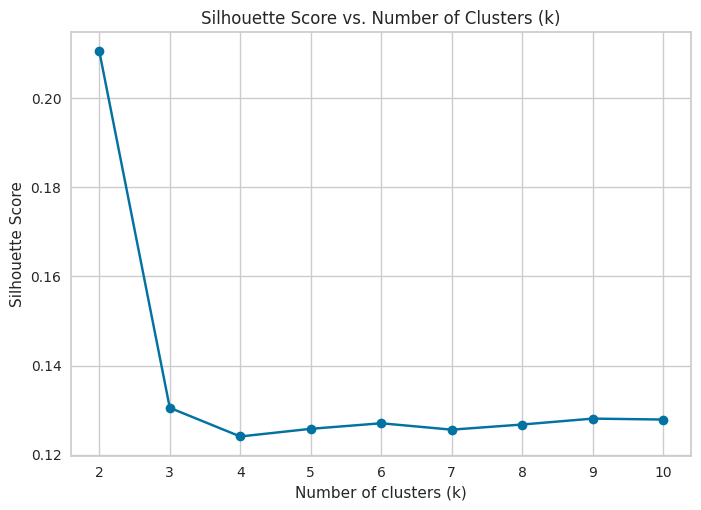

In [42]:
plt.plot(k_range, silhouette_scores_pca, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Silhouette Plot

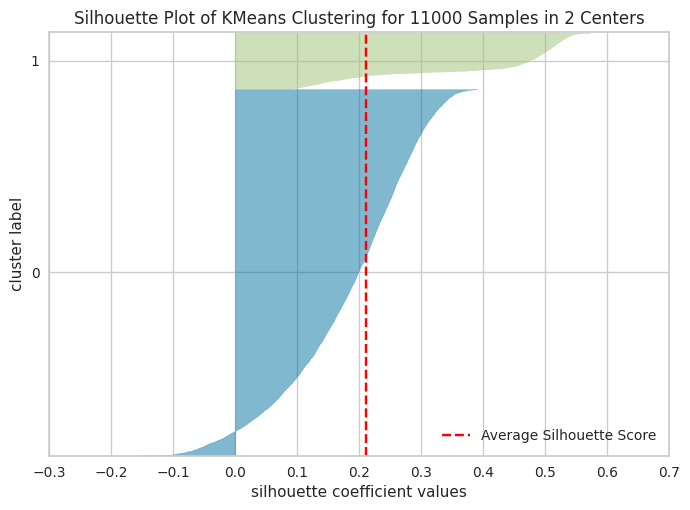

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
k_means_2 = KMeans(n_clusters=2, 
                   init='k-means++',
                   n_init=20,
                   random_state=1)

visualizer = SilhouetteVisualizer(k_means_2, colors='yellowbrick')

visualizer.fit(data_pca)
visualizer.show()

vary n_init

In [45]:
n_init_values = [1, 5, 10, 20, 50, 100]
silhouette_scores = []

for n_init in n_init_values:
    kmeans = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=n_init,
        random_state=1
    )
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    silhouette_scores.append(score)
    print(f"n_init = {n_init}: Silhouette Score = {score:.4f}")

n_init = 1: Silhouette Score = 0.2099
n_init = 5: Silhouette Score = 0.2102
n_init = 10: Silhouette Score = 0.2102
n_init = 20: Silhouette Score = 0.2105
n_init = 50: Silhouette Score = 0.2105
n_init = 100: Silhouette Score = 0.2105


- again k = 2 has the highest silhouette scores
- it is slighty higher than k = 2 on the non reduced data
- but still unusable with a score of 0.21
- silhouette plot: 
    - similiar picture as on the non reduced dataset
    - 2 cluster with one large and one small
    - cluster 1 is compact and small
    - cluster 2 is wide, has small scores and even negative ones
- varying hyperparameters did not change the silhouette scores

In [46]:
def plot_pca_clusters_with_centers(kmeans, X_pca, title, colors=['darkorange', 'darkmagenta', 'dodgerblue']):
    '''
    Plot KMeans clusters and centroids for PCA-reduced data (2D).
    Assumes X_pca is already PCA-transformed and has 2 columns (PC1, PC2).
    '''
    plt.figure(figsize=(8, 8))
    cluster_assignments = kmeans.fit_predict(X_pca)

    for i in range(len(np.unique(cluster_assignments))):
        plt.scatter(
            X_pca[cluster_assignments == i].iloc[:, 0],
            X_pca[cluster_assignments == i].iloc[:, 1],
            c=colors[i],
            label=f'Cluster {i}',
            alpha=0.7
        )

    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        s=350,
        marker='*',
        c='crimson',
        edgecolor='black',
        label='Centroids'
    )

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    return cluster_assignments

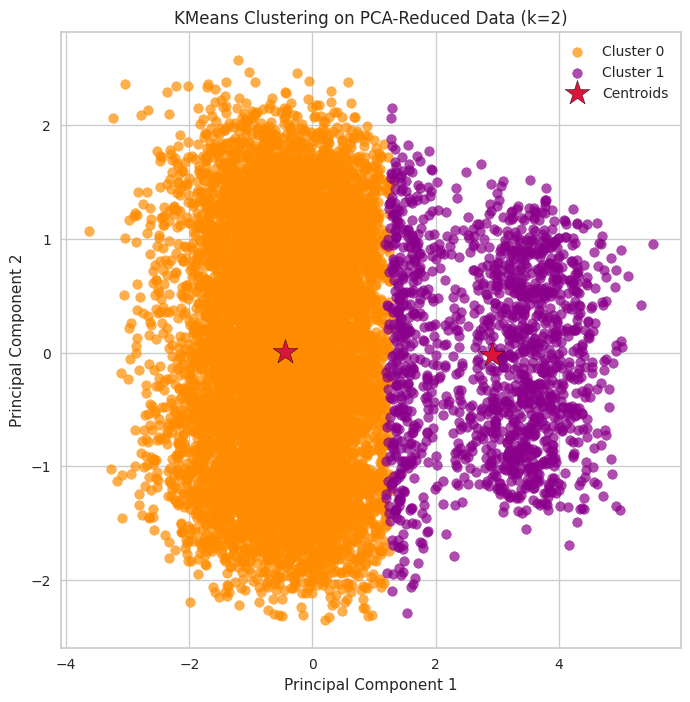

In [47]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1)
assignments = plot_pca_clusters_with_centers(kmeans_pca, data_pca, title="KMeans Clustering on PCA-Reduced Data (k=2)")

* Plotting datapoints and clusters in a 2D scatterplot of PC1 and PC2 
* Keep in mind: These components account for roughly 30% of the variance.
* Although the plot shows two distinct regions, the overlap between clusters is substantial.
* The decision boundary appears arbitrary, slicing through a high-density transition zone rather than a natural gap. 
* The clustering seems to ignore the underlying data geometry, imposing a split likely driven by KMeans’ assumption of spherical clusters. 
* The result suggests a forced partition rather than a discovery of genuine groupings.
* This supports earlier findings: although k = 2 performs best quantitatively, the real structure is weak and continuous, not discretely clustered.

k-means summary: 
- based on silhouette scores the best number of clusters is 2
- however, by convention the found structure would be labelled as "no structure"
- PCA improved the clustering slightly but not substantially
- Euclidean distance is used by default in KMeans and fits well with PCA-transformed, standardized data.
- -> no structure found in the data wih k-means

#### OPTICS on `data`

 OPTICS with Varying Parameters using Euclidean distance

In [48]:
def optics_param_euc(X):
    min_samples_list = [5, 10, 20]
    min_cluster_size_list = [0.01, 0.02, 0.05]
    xi_list = [0.01, 0.05, 0.1]

    results_summary = []

    for min_samples in min_samples_list:
        for min_cluster_size in min_cluster_size_list:
            for xi in xi_list:
                model = OPTICS(
                    min_samples=min_samples,
                    min_cluster_size=min_cluster_size,
                    xi=xi,
                    metric='euclidean'
                )
                model.fit(X)

                labels = model.labels_
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)

                results_summary.append({
                    'min_samples': min_samples,
                    'min_cluster_size': min_cluster_size,
                    'xi': xi,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise
                })

    return pd.DataFrame(results_summary)


In [50]:
summary_df = optics_param_euc(data)
summary_df.sort_values(by=['n_clusters', 'n_noise'], ascending=[False, True])

min_samples  min_cluster_size    xi  n_clusters  n_noise
1             5              0.01  0.05           1        0
2             5              0.01  0.10           1        0
4             5              0.02  0.05           1        0
5             5              0.02  0.10           1        0
7             5              0.05  0.05           1        0
8             5              0.05  0.10           1        0
9            10              0.01  0.01           1        0
10           10              0.01  0.05           1        0
11           10              0.01  0.10           1        0
12           10              0.02  0.01           1        0
13           10              0.02  0.05           1        0
14           10              0.02  0.10           1        0
15           10              0.05  0.01           1        0
16           10              0.05  0.05           1        0
17           10              0.05  0.10           1        0
18           20              0.01  0.01           1        0
19           20              0.01  0.05           1        0
20           20              0.01  0.10           1        0
21           20              0.02  0.01           1        0
22           20              0.02  0.05           1        0
23           20              0.02  0.10           1        0
24           20              0.05  0.01           1        0
25           20              0.05  0.05           1        0
26           20              0.05  0.10           1        0
0             5              0.01  0.01           1     9978
3             5              0.02  0.01           1     9978
6             5              0.05  0.01           1     9978

final OPTICS model (euclidean)

In [52]:
#Configuration chosen
min_samples = 10
min_cluster_size = 0.02
xi = 0.05
metric = 'euclidean'

model_opt = OPTICS(
    min_samples=min_samples,
    min_cluster_size=min_cluster_size,
    xi=xi,
    metric=metric
)
model_opt.fit(data)

labels = model_opt.labels_
ordering = model_opt.ordering_
reachability = model_opt.reachability_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

Reachability Plot

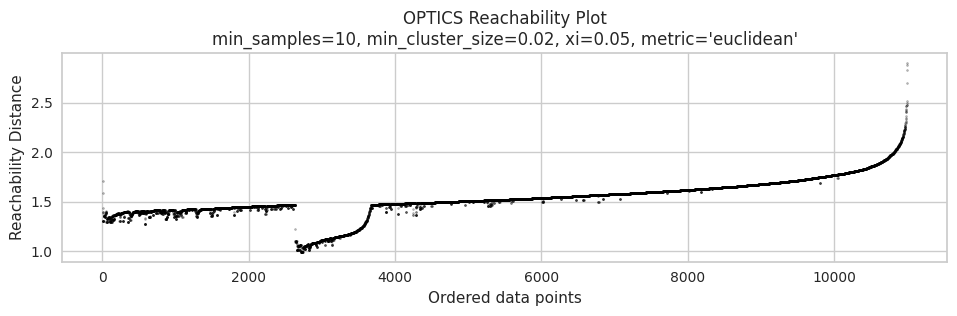

Number of clusters: 1
Number of noise points: 0


In [54]:
space = np.arange(len(data))
plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability[ordering], alpha=0.3, s=2, color='black')
plt.title(f"OPTICS Reachability Plot\nmin_samples={min_samples}, min_cluster_size={min_cluster_size}, xi={xi}, metric='{metric}'")
plt.xlabel("Ordered data points")
plt.ylabel("Reachability Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

- Across 27 combinations of the OPTICS algorithm's core parameters (min_samples, min_cluster_size, and xi), the clustering structure remained highly stable.
- In 24 out of 27 configurations, OPTICS identified a single behavioral cluster with no noise points, indicating a densely connected population without clear subgroups.
- Interestingly, when xi = 0.01, the results varied significantly depending on min_samples:
    - With a low min_samples = 5, OPTICS labeled the majority of data points as noise, isolating only a small ultra-dense core.
    - In contrast, with min_samples = 20, the algorithm suppressed sensitivity to small density variations, resulting in a single large cluster without any noise points.
- Based on the grid search, the final configuration was selected as min_samples = 10, min_cluster_size = 0.02, and xi = 0.05.
- This setup yielded a single, well-defined behavioral cluster with no noise points and was chosen because it balances sensitivity to density fluctuations without being overly strict or permissive.
- The findings suggest that the dataset forms one continuous behavioral group rather than distinct clusters, with a particularly dense subgroup observable in the reachability plot but not sufficient for automatic separation under standard OPTICS criteria.

 OPTICS with Varying Parameters using Cosine distance

In [55]:
def optics_param_cos(X):
    min_samples_list = [5, 10, 20]
    min_cluster_size_list = [0.01, 0.02, 0.05]
    xi_list = [0.01, 0.05, 0.1]

    results_summary = []

    for min_samples in min_samples_list:
        for min_cluster_size in min_cluster_size_list:
            for xi in xi_list:
                model = OPTICS(
                    min_samples=min_samples,
                    min_cluster_size=min_cluster_size,
                    xi=xi,
                    metric='cosine'
                )
                model.fit(X)

                labels = model.labels_
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)

                results_summary.append({
                    'min_samples': min_samples,
                    'min_cluster_size': min_cluster_size,
                    'xi': xi,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise
                })

    return pd.DataFrame(results_summary)


In [56]:
summary_optics_cos = optics_param_cos(data)
summary_optics_cos.sort_values(by=['n_clusters', 'n_noise'], ascending=[False, True])

min_samples  min_cluster_size    xi  n_clusters  n_noise
9            10              0.01  0.01           2     9823
1             5              0.01  0.05           1        0
2             5              0.01  0.10           1        0
4             5              0.02  0.05           1        0
5             5              0.02  0.10           1        0
7             5              0.05  0.05           1        0
8             5              0.05  0.10           1        0
10           10              0.01  0.05           1        0
11           10              0.01  0.10           1        0
13           10              0.02  0.05           1        0
14           10              0.02  0.10           1        0
16           10              0.05  0.05           1        0
17           10              0.05  0.10           1        0
20           20              0.01  0.10           1        0
23           20              0.02  0.10           1        0
26           20              0.05  0.10           1        0
18           20              0.01  0.01           1     9914
21           20              0.02  0.01           1     9914
24           20              0.05  0.01           1     9914
12           10              0.02  0.01           1     9943
15           10              0.05  0.01           1     9943
19           20              0.01  0.05           1     9981
22           20              0.02  0.05           1     9981
25           20              0.05  0.05           1     9981
0             5              0.01  0.01           1    10034
3             5              0.02  0.01           1    10034
6             5              0.05  0.01           1    10034

Final OPTICS model

In [58]:
#Configuration chosen
min_samples = 10
min_cluster_size = 0.02
xi = 0.05
metric = 'cosine'

model_cos = OPTICS(
    min_samples=min_samples,
    min_cluster_size=min_cluster_size,
    xi=xi,
    metric=metric
)
model_cos.fit(data)

labels = model_cos.labels_
ordering = model_cos.ordering_
reachability = model_cos.reachability_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

Reachability Plot

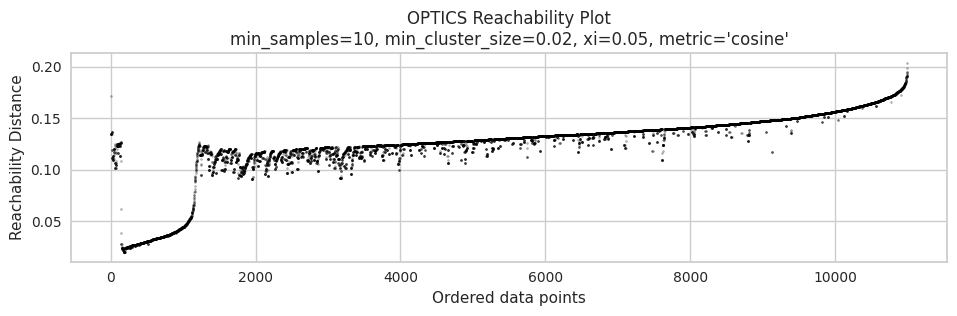

Number of clusters: 1
Number of noise points: 0


In [59]:
space = np.arange(len(data))
plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability[ordering], alpha=0.3, s=2, color='black')
plt.title(f"OPTICS Reachability Plot\nmin_samples={min_samples}, min_cluster_size={min_cluster_size}, xi={xi}, metric='{metric}'")
plt.xlabel("Ordered data points")
plt.ylabel("Reachability Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

- Across 27 combinations of the OPTICS algorithm's core parameters (min_samples, min_cluster_size, and xi), the clustering structure remained highly stable when using cosine distance.
- In most configurations, OPTICS identified a single behavioral cluster with no noise points, similar to the results obtained with Euclidean distance.
- When xi = 0.01, the results varied significantly depending on min_samples:
    - In some runs, OPTICS labeled over 90% of the data as noise, isolating only a very dense core.
    - In other runs with higher min_samples, the entire dataset was retained as a single cluster without noise points.
- Cosine distance was chosen because it emphasizes directional similarity between behavioral profiles, making it more suitable for identifying clusters based on patterns of behavior rather than absolute feature values.
- Based on the grid search, the final configuration was selected as min_samples = 10, min_cluster_size = 0.02, and xi = 0.05.
- This setup yielded a single, well-defined behavioral cluster with no noise points, consistent with the Euclidean-based clustering.
- The findings confirm that the behavioral structure of the dataset is stable across different distance metrics, forming one continuous, coherent group without distinct subclusters.

## Euclidean vs. Cosine: 
- The primary goal of the project was to identify groups of individuals who exhibit similar patterns across variables such as sleep hours, caffeine intake, and stress levels.
- Cosine distance was selected as the main distance function for OPTICS because it measures directional similarity between individuals' behavioral profiles, focusing on patterns of behavior rather than absolute amounts.
- This choice is appropriate for psychological and behavioral data, where relative behavior (e.g., "low sleep with high stress") is often more meaningful than raw feature values
- Using cosine distance ensures that individuals who show similar behavioral tendencies, even if on different scales, are clustered together.

#### OPTICS on (`data_pca`)

OPTICS model with different hyperparamters

In [60]:
def optics_param_cos_pca(X):
    min_samples_list = [5, 10, 20]
    min_cluster_size_list = [0.01, 0.02, 0.05]
    xi_list = [0.01, 0.05, 0.1]

    results_summary = []

    for min_samples in min_samples_list:
        for min_cluster_size in min_cluster_size_list:
            for xi in xi_list:
                model = OPTICS(
                    min_samples=min_samples,
                    min_cluster_size=min_cluster_size,
                    xi=xi,
                    metric='cosine'
                )
                model.fit(X)

                labels = model.labels_
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)

                results_summary.append({
                    'min_samples': min_samples,
                    'min_cluster_size': min_cluster_size,
                    'xi': xi,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise
                })

    return pd.DataFrame(results_summary)

In [61]:
summary_pca_cos = optics_param_cos_pca(data_pca)
summary_pca_cos.sort_values(by=['n_clusters', 'n_noise'], ascending=[False, True])

min_samples  min_cluster_size    xi  n_clusters  n_noise
18           20              0.01  0.01           2     9893
9            10              0.01  0.01           2    10030
2             5              0.01  0.10           1        0
5             5              0.02  0.10           1        0
8             5              0.05  0.10           1        0
11           10              0.01  0.10           1        0
14           10              0.02  0.10           1        0
17           10              0.05  0.10           1        0
20           20              0.01  0.10           1        0
23           20              0.02  0.10           1        0
26           20              0.05  0.10           1        0
10           10              0.01  0.05           1     9972
13           10              0.02  0.05           1     9972
16           10              0.05  0.05           1     9972
19           20              0.01  0.05           1     9977
22           20              0.02  0.05           1     9977
25           20              0.05  0.05           1     9977
1             5              0.01  0.05           1     9981
4             5              0.02  0.05           1     9981
7             5              0.05  0.05           1     9981
21           20              0.02  0.01           1    10051
24           20              0.05  0.01           1    10051
6             5              0.05  0.01           1    10080
12           10              0.02  0.01           1    10144
15           10              0.05  0.01           1    10144
3             5              0.02  0.01           1    10457
0             5              0.01  0.01           1    10890

final lenient OPTICS model

In [62]:
#chosen lenient configuration
min_samples = 10
min_cluster_size = 0.02
xi = 0.10
metric = 'cosine'

model = OPTICS(
    min_samples=min_samples,
    min_cluster_size=min_cluster_size,
    xi=xi,
    metric=metric
)
model.fit(data_pca)
labels = model.labels_
ordering = model.ordering_
reachability = model.reachability_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

Reachability Plot

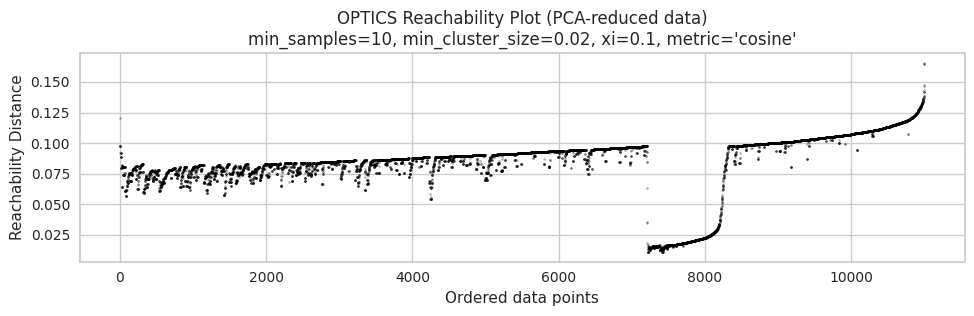

Number of clusters: 1
Number of noise points: 0


In [63]:
space = np.arange(len(data_pca))
plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability[ordering], alpha=0.3, s=2, color='black')
plt.title(
    f"OPTICS Reachability Plot (PCA-reduced data)\n"
    f"min_samples={min_samples}, min_cluster_size={min_cluster_size}, xi={xi}, metric='{metric}'"
)
plt.xlabel("Ordered data points")
plt.ylabel("Reachability Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

final strict OPTICS model

In [64]:
#chosen strict configuration
min_samples = 10
min_cluster_size = 0.02
xi = 0.05
metric = 'cosine'

model = OPTICS(
    min_samples=min_samples,
    min_cluster_size=min_cluster_size,
    xi=xi,
    metric=metric
)
model.fit(data_pca)
labels = model.labels_
ordering = model.ordering_
reachability = model.reachability_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

Reachability Plot

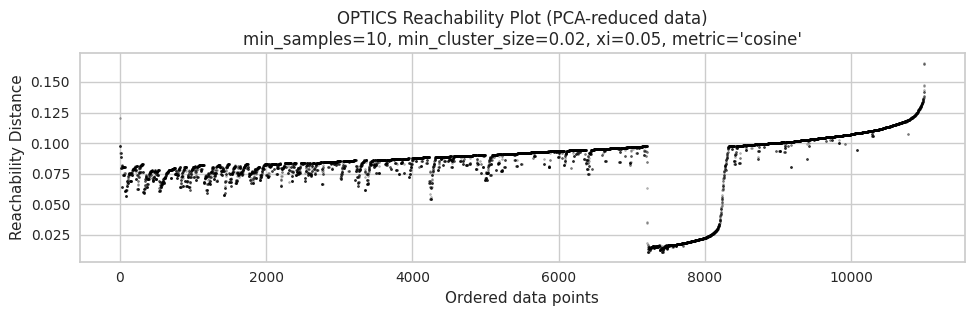

Number of clusters: 1
Number of noise points: 9972


In [65]:
space = np.arange(len(data_pca))
plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability[ordering], alpha=0.3, s=2, color='black')
plt.title(
    f"OPTICS Reachability Plot (PCA-reduced data)\n"
    f"min_samples={min_samples}, min_cluster_size={min_cluster_size}, xi={xi}, metric='{metric}'"
)
plt.xlabel("Ordered data points")
plt.ylabel("Reachability Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

- OPTICS was applied to the PCA-reduced dataset using cosine distance to identify behavioral clusters based on patterns rather than absolute values.
- Out of 27 parameter combinations (min_samples, min_cluster_size, and xi), most configurations produced a single cluster, but the number of noise points varied significantly depending on xi.
    - With a lenient setting (xi = 0.10), most runs resulted in one cluster with 0 noise points, suggesting that the population forms a broad, continuous behavioral structure.
    - With a stricter setting (xi = 0.05), only ~1,100 individuals were included in a cluster, while over 9,900 were labeled as noise — indicating the presence of a dense behavioral core within a more diffuse population.
- Two configurations produced two clusters, but with extremely high noise (9,800+ points)
    - but reachability plot only shows one valley > dicarded
- The final configuration selected for the general population view was:
    - min_samples = 10 
        - balances sensitivity and robustness when identifying core points.
    - min_cluster_size = 0.02 
        - allows detection of mid-sized clusters without overfragmentation.
    - xi = 0.10 
        - lenient setting that avoids over-splitting and favors inclusivity.
    - metric = 'cosine' 
        - emphasizes directional similarity, which fits the goal of identifying behavioral patterns.
- To complement this, a second, stricter configuration (xi = 0.05) was applied to isolate the dense valley visible in the reachability plot.
    - This identified a compact behavioral subgroup (~1,100 individuals) and labeled the rest as noise.
    - It provides a more selective view of the data, emphasizing the presence of a core cluster embedded in a looser structure.
- The two configurations offer both a generalizable population-level view and a focused subgroup analysis, demonstrating the stability and structure of behavioral patterns in the dataset.
- Mirroring the results of the Clustering with the unreduced dataset.

#### HAC on `data`

Function for Linkage Matrix

In [66]:
def create_linkage(agg):
    n_samples = len(agg.labels_)
    counts = np.zeros(agg.children_.shape[0])
    for i, merge in enumerate(agg.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts]).astype(float)
    return linkage_matrix

Hierarchical Clustering and Dendrogram Visualization

In [67]:
def cluster_and_draw(df, n_clusters, affinity, linkage_method):
    agg = cluster.AgglomerativeClustering(
        n_clusters=n_clusters,
        metric=affinity,
        linkage=linkage_method,
        compute_distances=True
    )
    labels = agg.fit_predict(df)
    plt.figure(figsize=(18, 5))
    dendrogram(
        create_linkage(agg),
        orientation='top'
    )
    plt.title(f"HAC Dendrogram (linkage='{linkage_method}', metric='{affinity}')")
    plt.xlabel("Merged Cluster")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return labels

HAC with different hyperparameter (Euclidean distance)

HAC with Ward, Complete, and Average linkage (Euclidean distance):

Ward linkage:
- Reveals one large, dense group on the left side with very low merge distances.
- The right side consists of many smaller clusters forming a loosely defined second group.
- A large vertical jump at the top indicates clear separation between the two main cluster regions.
- Suggests a structure with a compact behavioral core and a more heterogeneous surrounding group.

Complete linkage:
- Merges occur more gradually, with a wide spread of merge distances.
- No clear dominant jump suggests a lack of well defined clusters.
- Indicates subtle local groupings without strong boundaries between larger groups.

Average linkage:
- Displays extremely gradual merging, with nearly all clusters joining below distance ~6.
- No large height differences between major merges.
- Lacks distict grouping.


HAC with different hyperparameter (Cosine distance)


 Running HAC with: n_clusters=1, linkage=average, metric=cosine


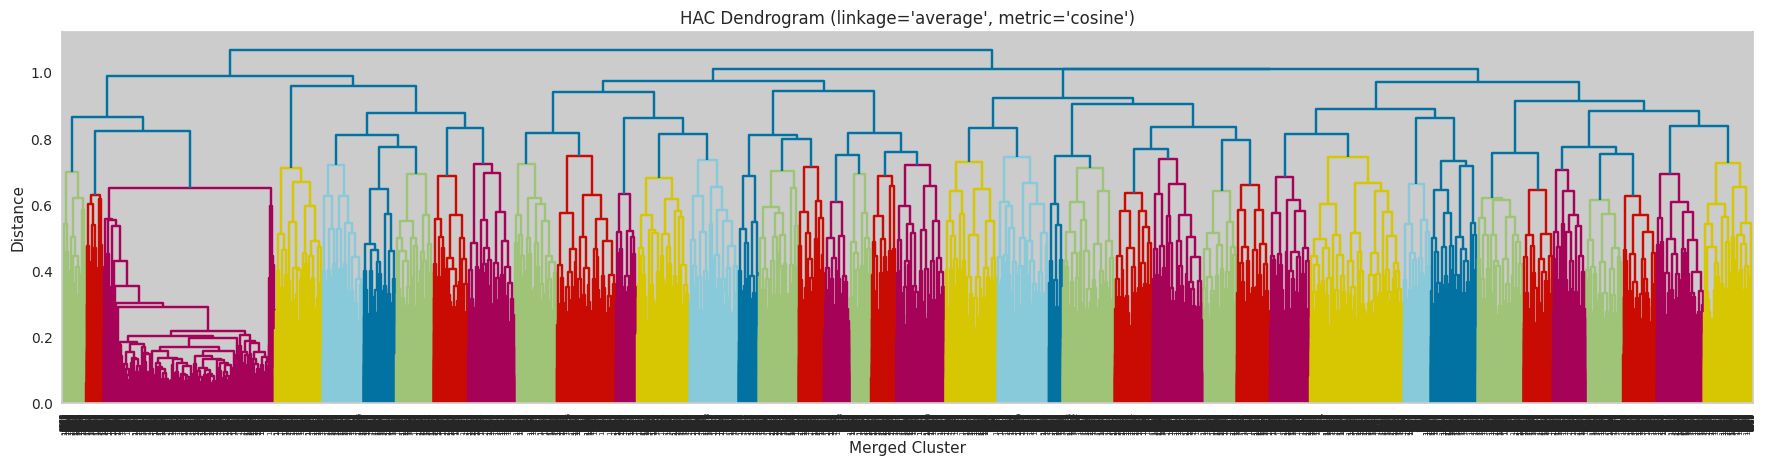


 Running HAC with: n_clusters=1, linkage=complete, metric=cosine


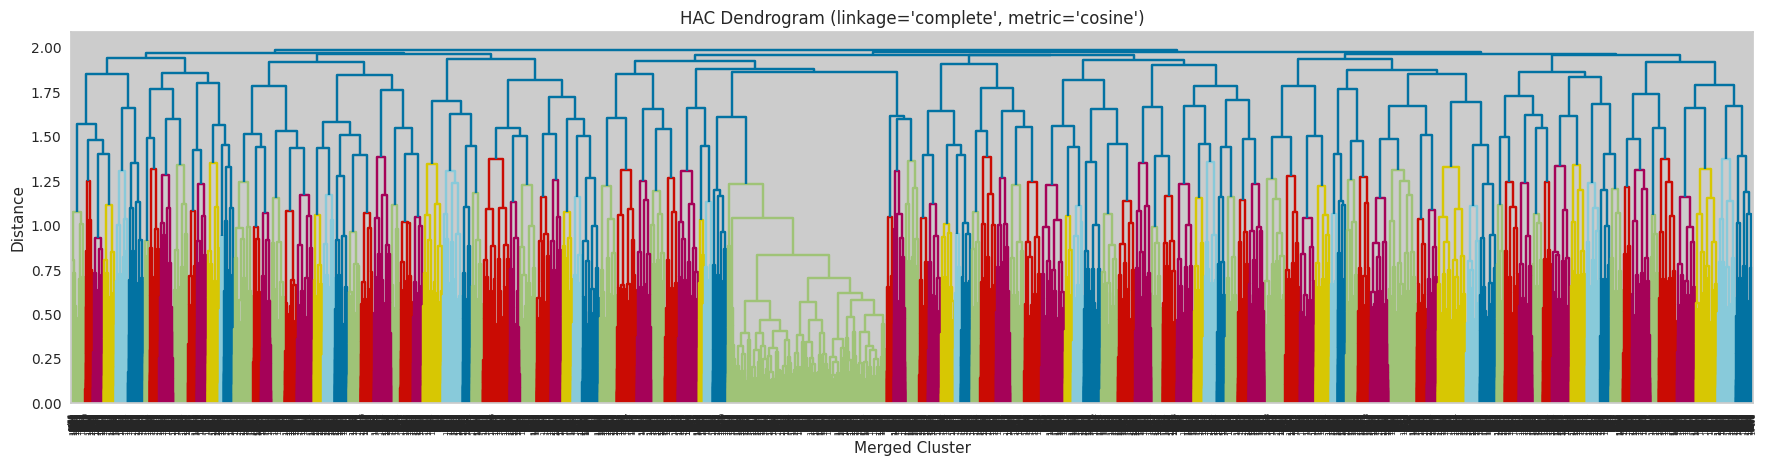


 Running HAC with: n_clusters=2, linkage=average, metric=cosine


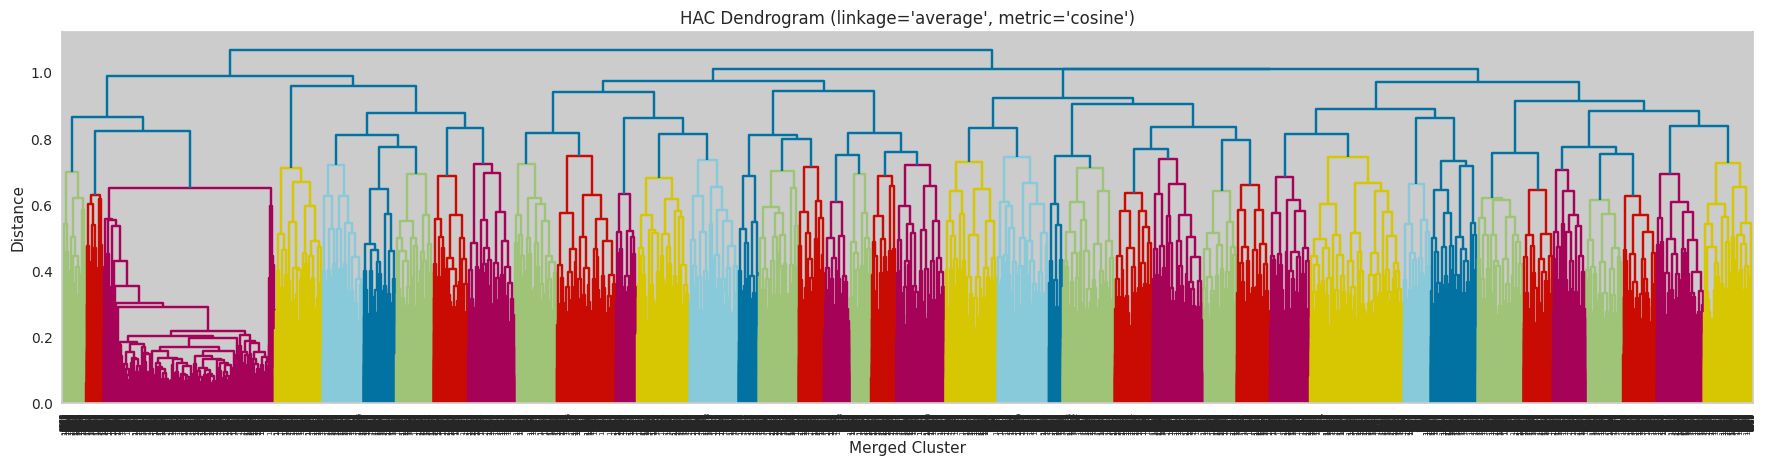


 Running HAC with: n_clusters=2, linkage=complete, metric=cosine


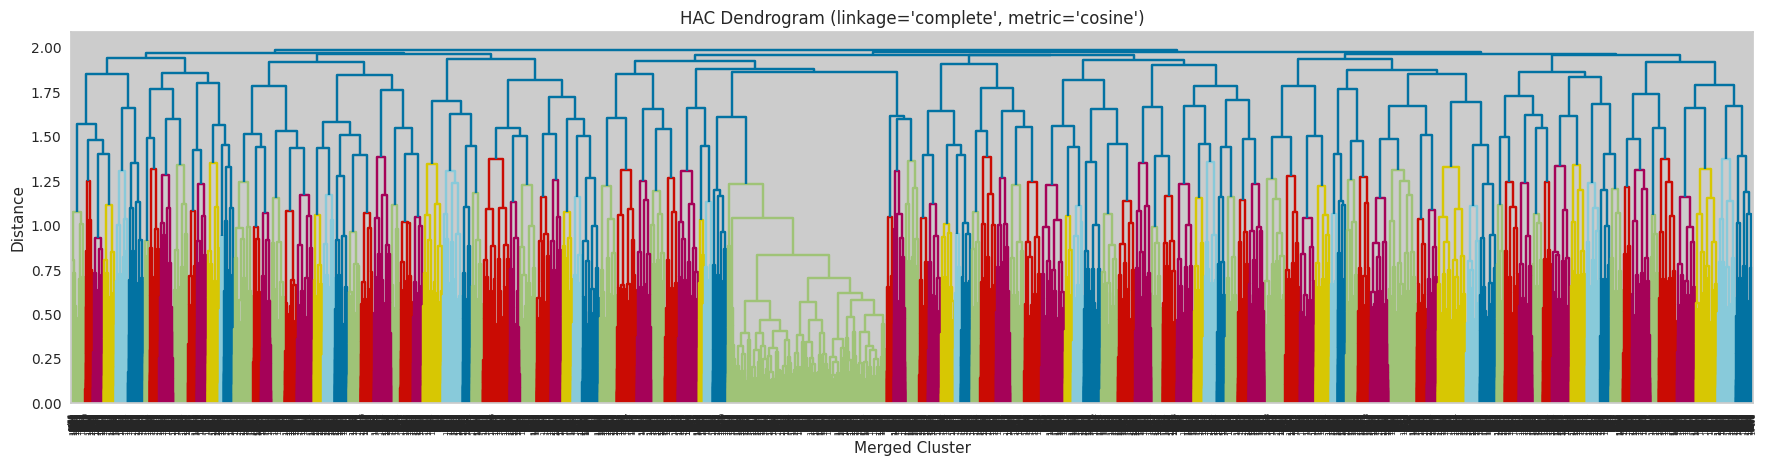


 Running HAC with: n_clusters=3, linkage=average, metric=cosine


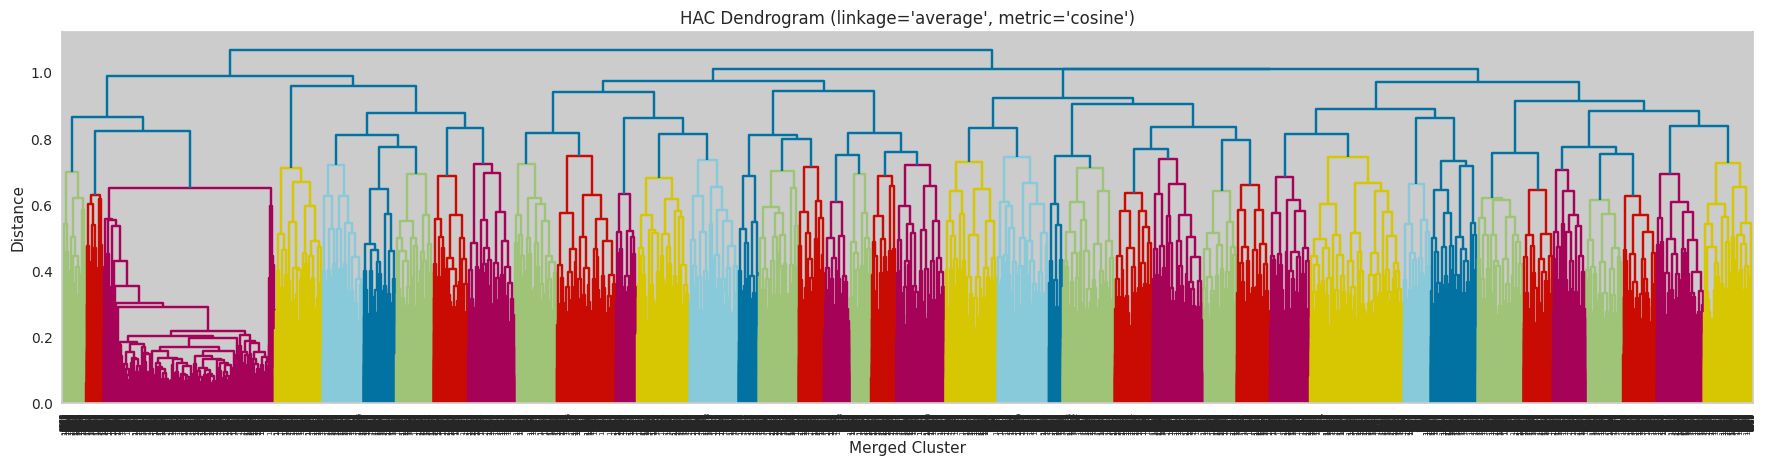


 Running HAC with: n_clusters=3, linkage=complete, metric=cosine


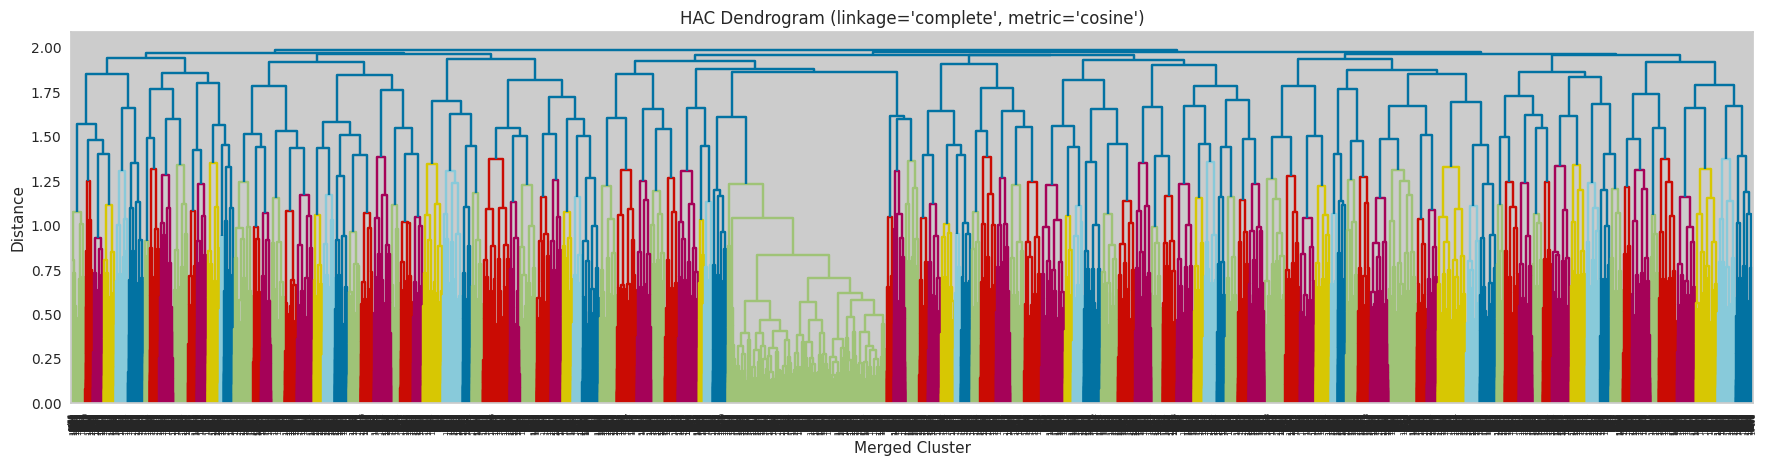

In [69]:
affinities = ['cosine']
linkages = ['average', 'complete']  
n_clusters_list = [1, 2, 3]

results = {}

for n_clusters in n_clusters_list:
    for affinity in affinities:
        for linkage_method in linkages:

            print(f"\n Running HAC with: n_clusters={n_clusters}, linkage={linkage_method}, metric={affinity}")

            try:
                labels = cluster_and_draw(
                    df=data,
                    n_clusters=n_clusters,
                    affinity=affinity,
                    linkage_method=linkage_method
                )
                
                key = f"{n_clusters}_{linkage_method}_{affinity}"
                results[key] = labels

            except Exception as e:
                print(f"Error with {linkage_method} + {affinity}: {e}")

HAC with cosine distance:

Average linkage:
- Merges occur gradually and below a distance of 1.0.
- No major split in the hierarchy.
- A few compact and small clusters may exist but are not clearly separated.

Complete linkage:
- Produces a taller tree with more variation in merge distances (up to ~2.0).
- Still no strong jump between major merges
- Suggesting no dominant cluster boundaries.

Overall: 
- HAC results using both Euclidean and Cosine distance reveal no strong natural clusters in the data.
- Ward linkage (Euclidean) suggests a possible split between a dense group and a looser surrounding group.
- Cosine-based linkages (average and complete) suggest no dominant clusters.

#### HAC on `data_pca`

HAC with different hyperparameter (Euclidean distance)


 Running HAC with: n_clusters=1, linkage=ward, metric=euclidean


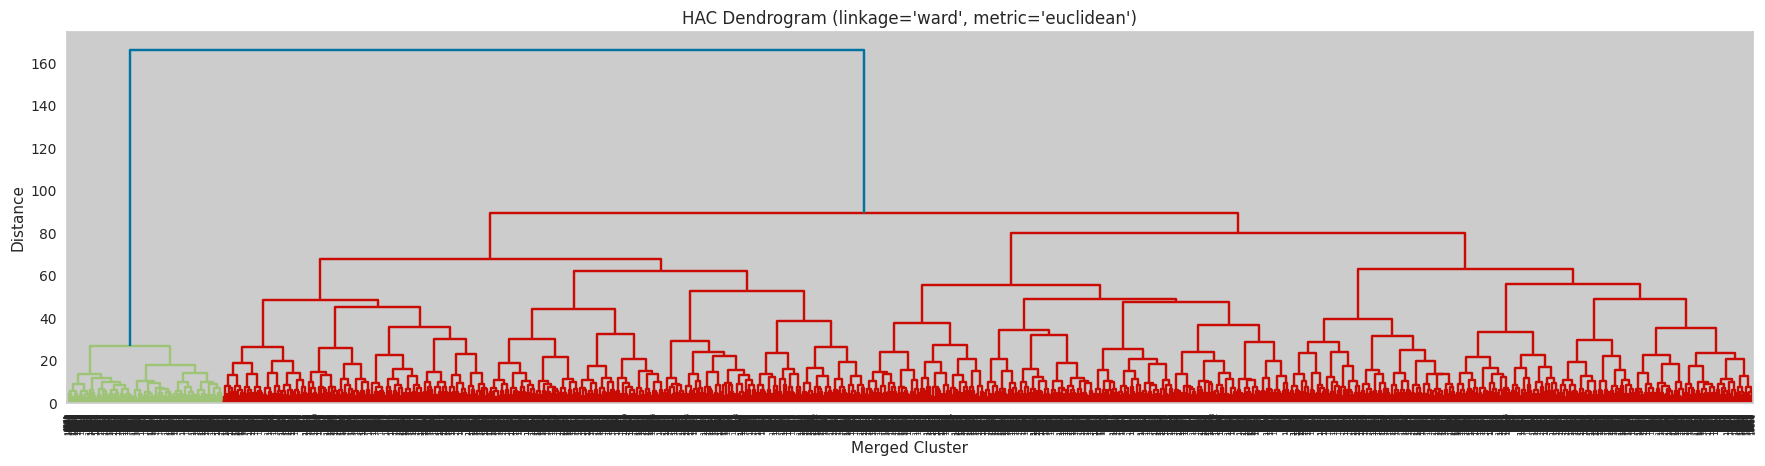


 Running HAC with: n_clusters=1, linkage=complete, metric=euclidean


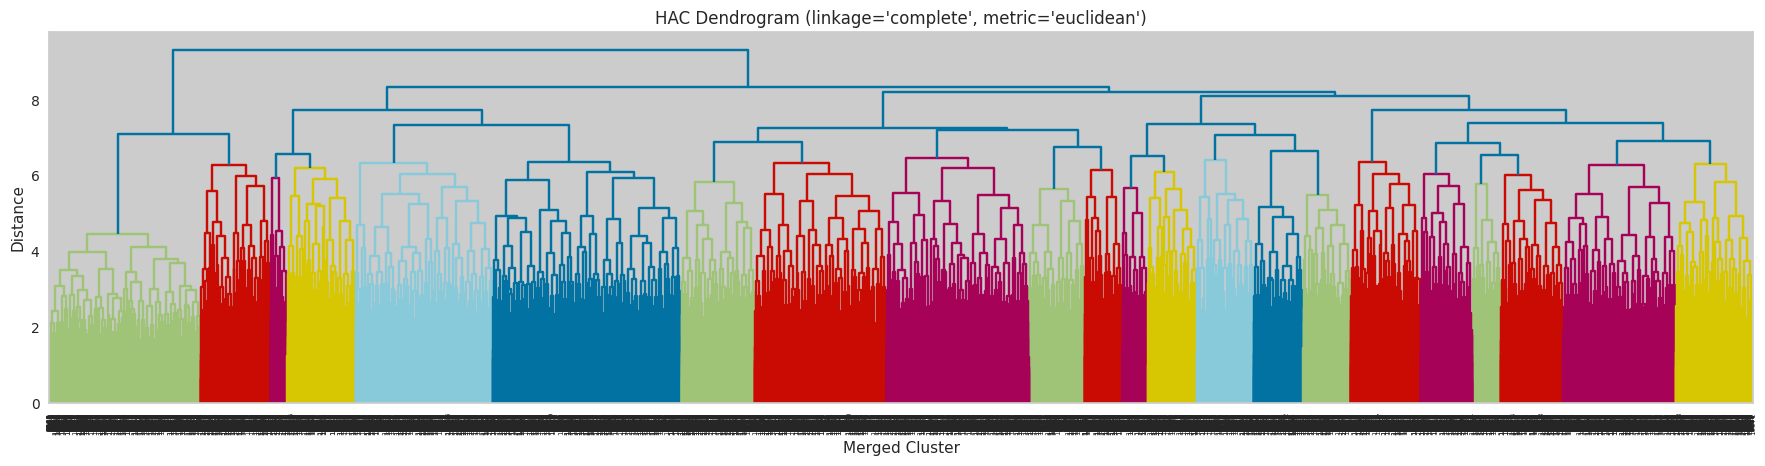


 Running HAC with: n_clusters=1, linkage=average, metric=euclidean


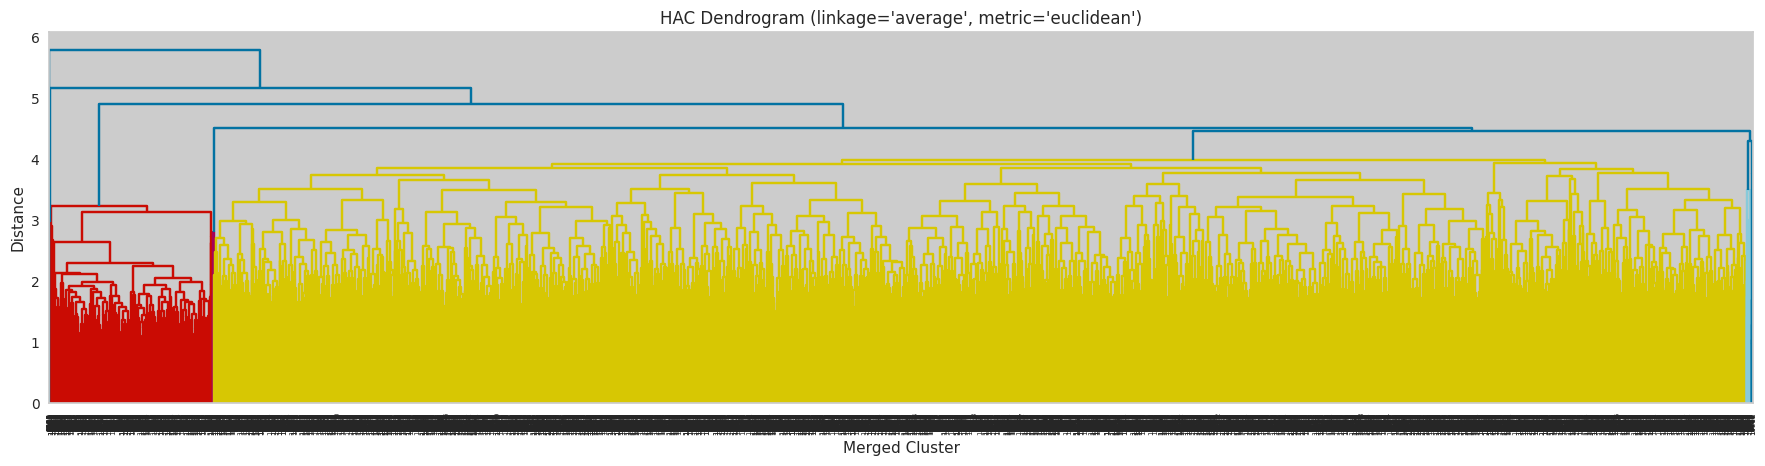


 Running HAC with: n_clusters=2, linkage=ward, metric=euclidean


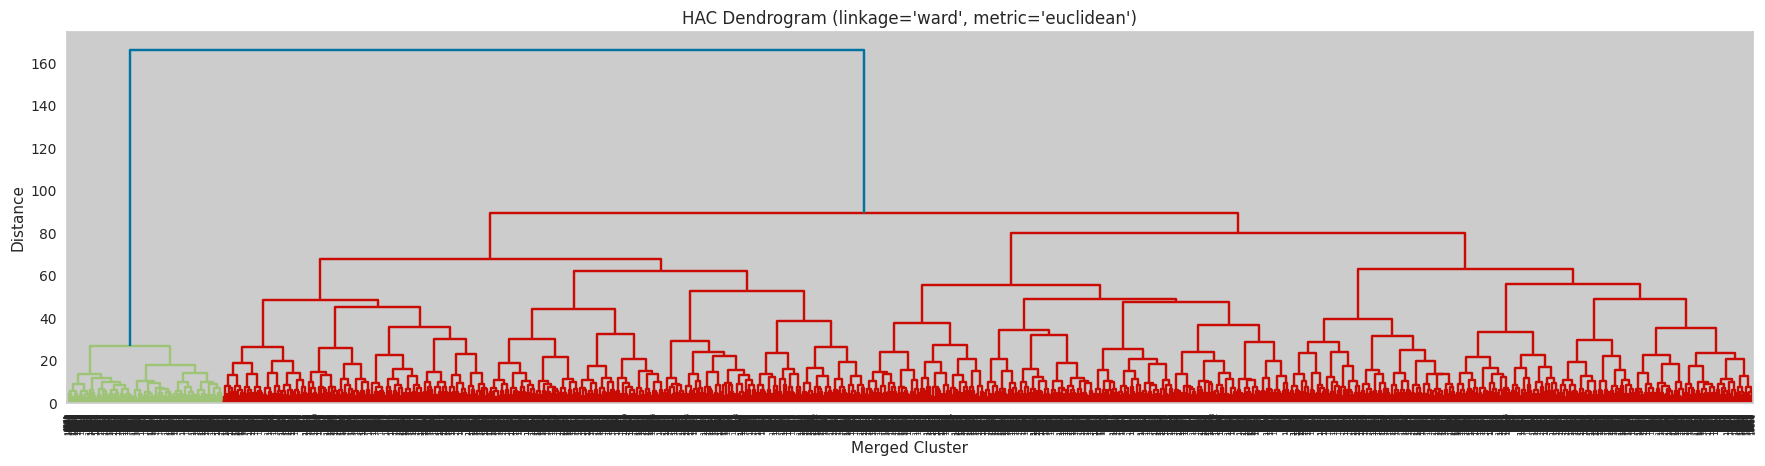


 Running HAC with: n_clusters=2, linkage=complete, metric=euclidean


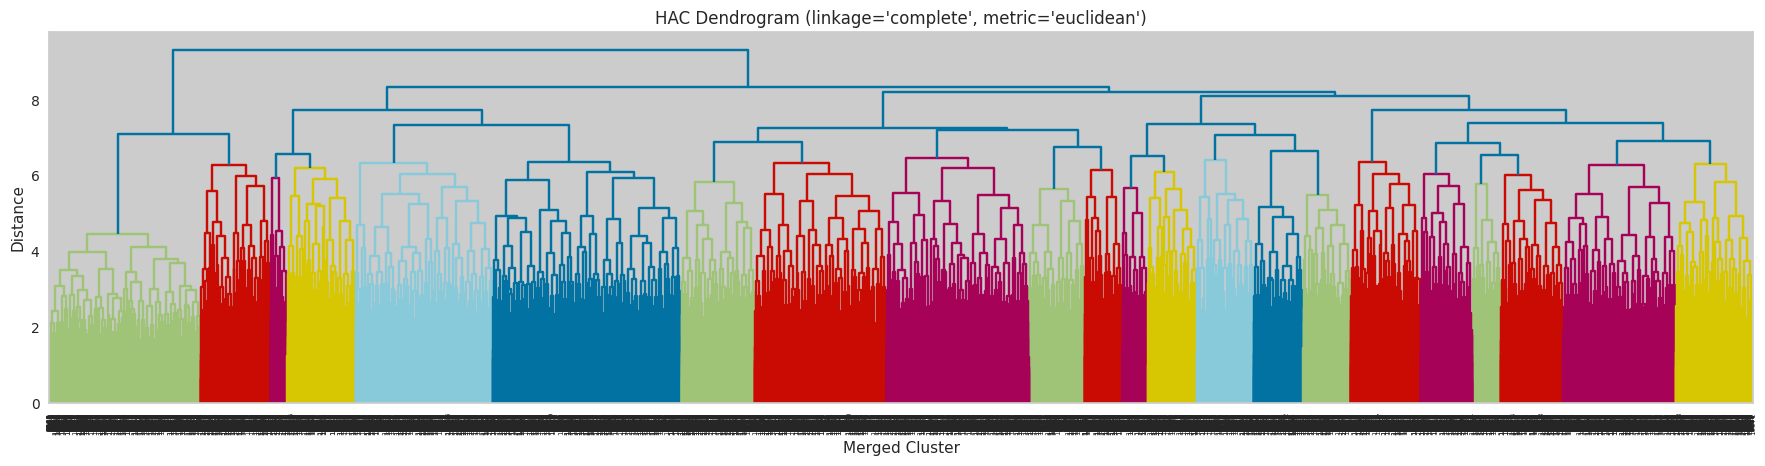


 Running HAC with: n_clusters=2, linkage=average, metric=euclidean


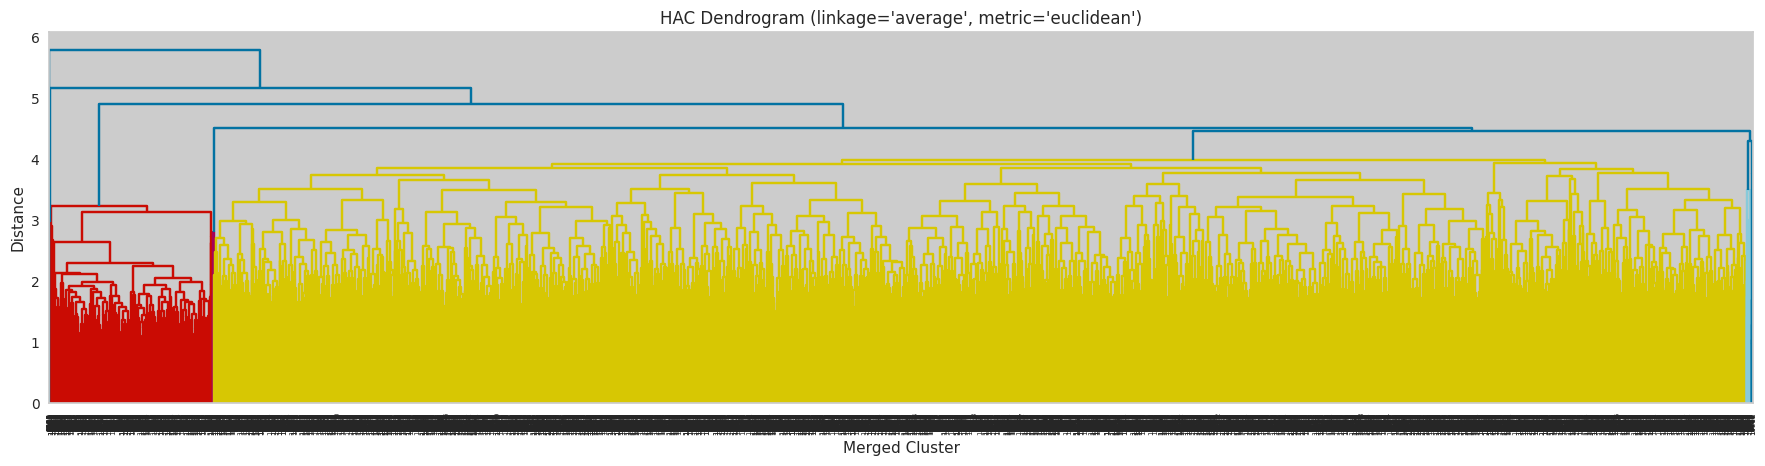


 Running HAC with: n_clusters=3, linkage=ward, metric=euclidean


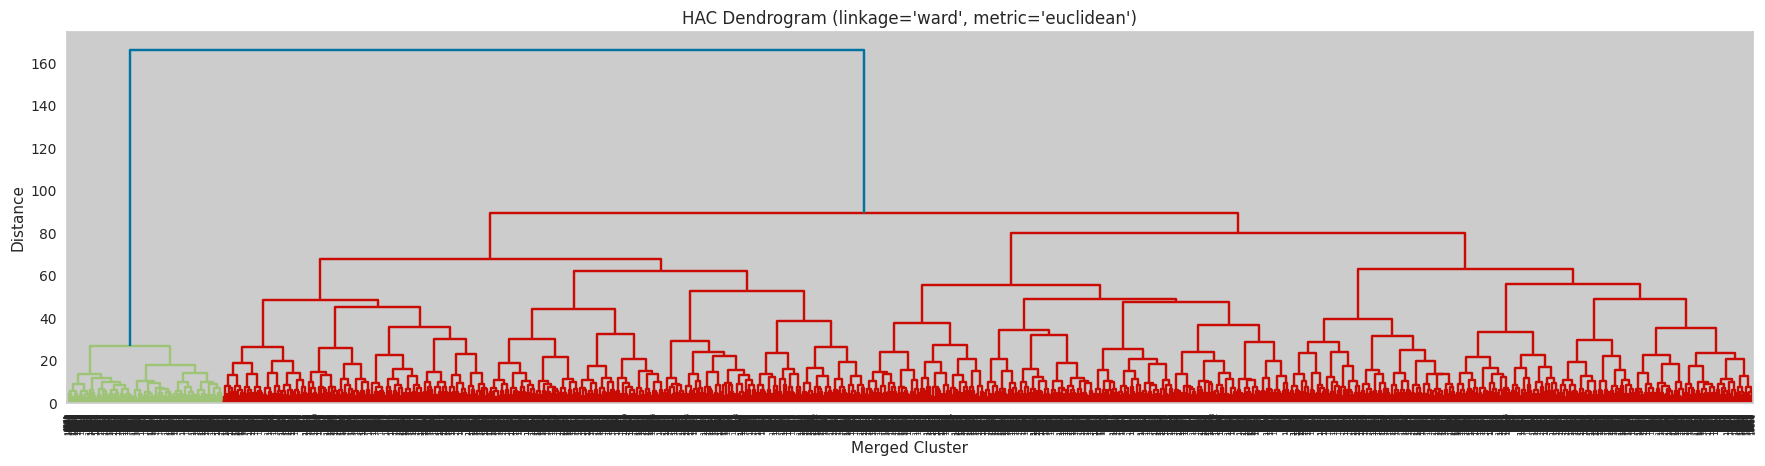


 Running HAC with: n_clusters=3, linkage=complete, metric=euclidean


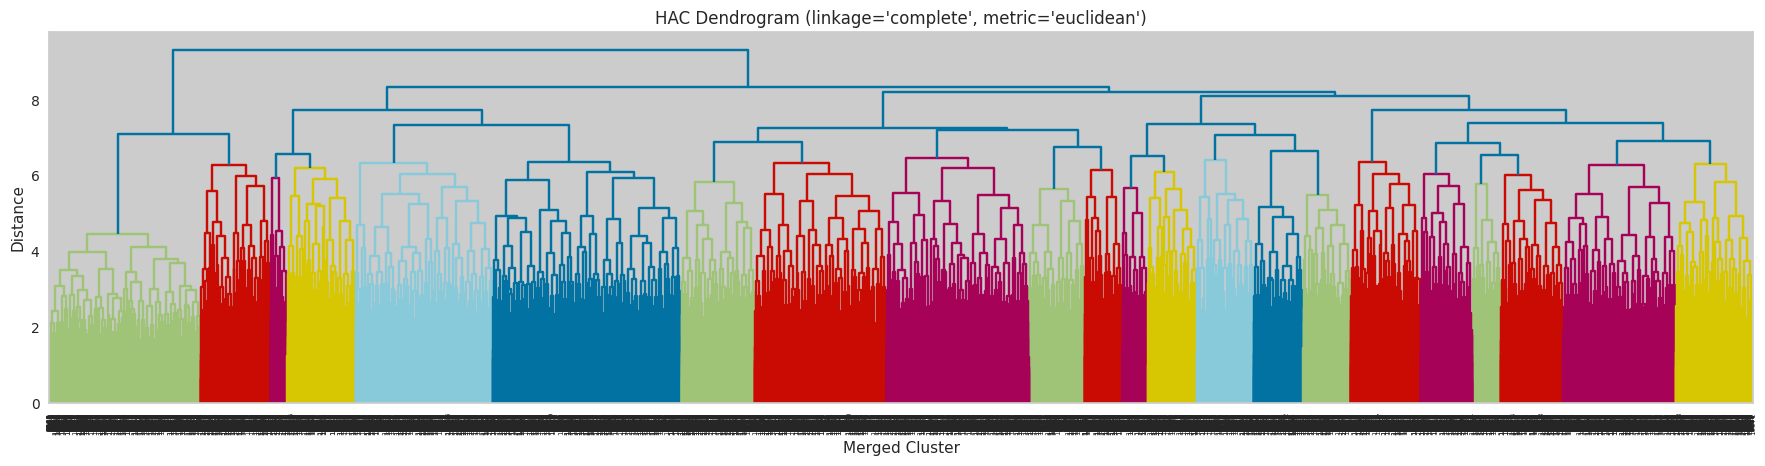


 Running HAC with: n_clusters=3, linkage=average, metric=euclidean


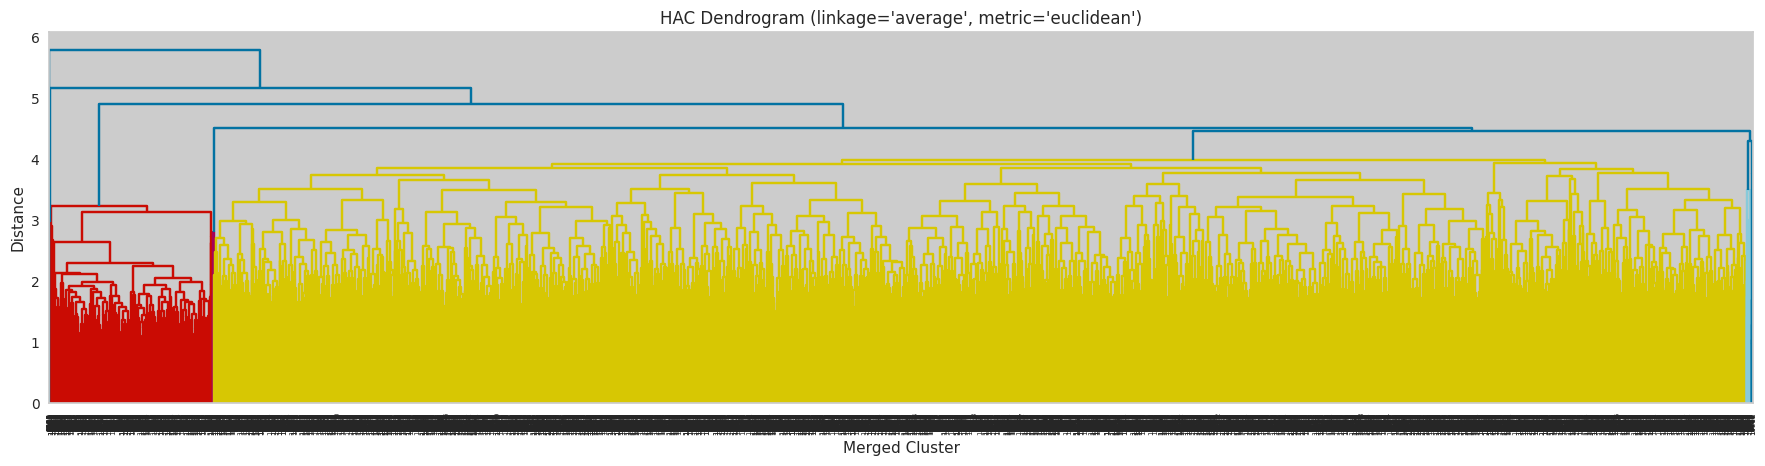

In [70]:
n_clusters_list = [1, 2, 3]
affinities = ['euclidean']
linkages = ['ward', 'complete', 'average']

results = {}

for n_clusters in n_clusters_list:
    for affinity in affinities:
        for linkage_method in linkages:

            print(f"\n Running HAC with: n_clusters={n_clusters}, linkage={linkage_method}, metric={affinity}")

            try:
                labels = cluster_and_draw(
                    df=data_pca,
                    n_clusters=n_clusters,
                    affinity=affinity,
                    linkage_method=linkage_method
                )
                
                key = f"{n_clusters}_{linkage_method}_{affinity}"
                results[key] = labels

            except Exception as e:
                print(f"Error with {linkage_method} + {affinity}: {e}")


HAC with different hyperparameter (Cosine distance)


 Running HAC with: n_clusters=1, linkage=average, metric=cosine


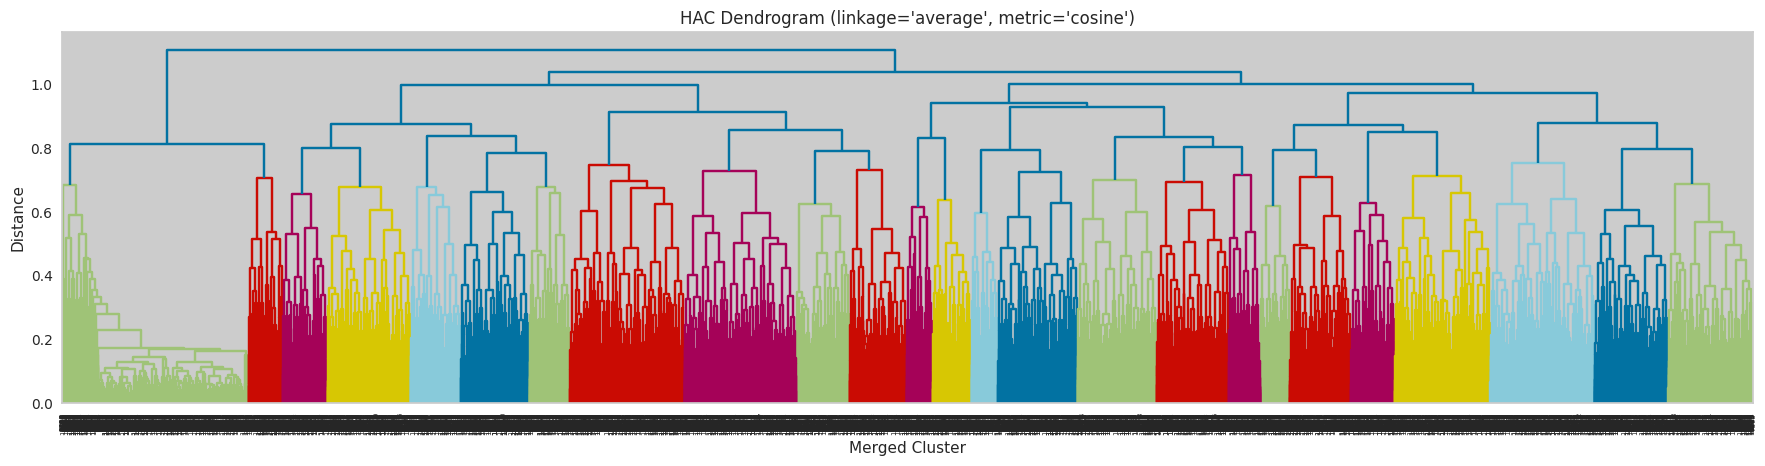


 Running HAC with: n_clusters=1, linkage=complete, metric=cosine


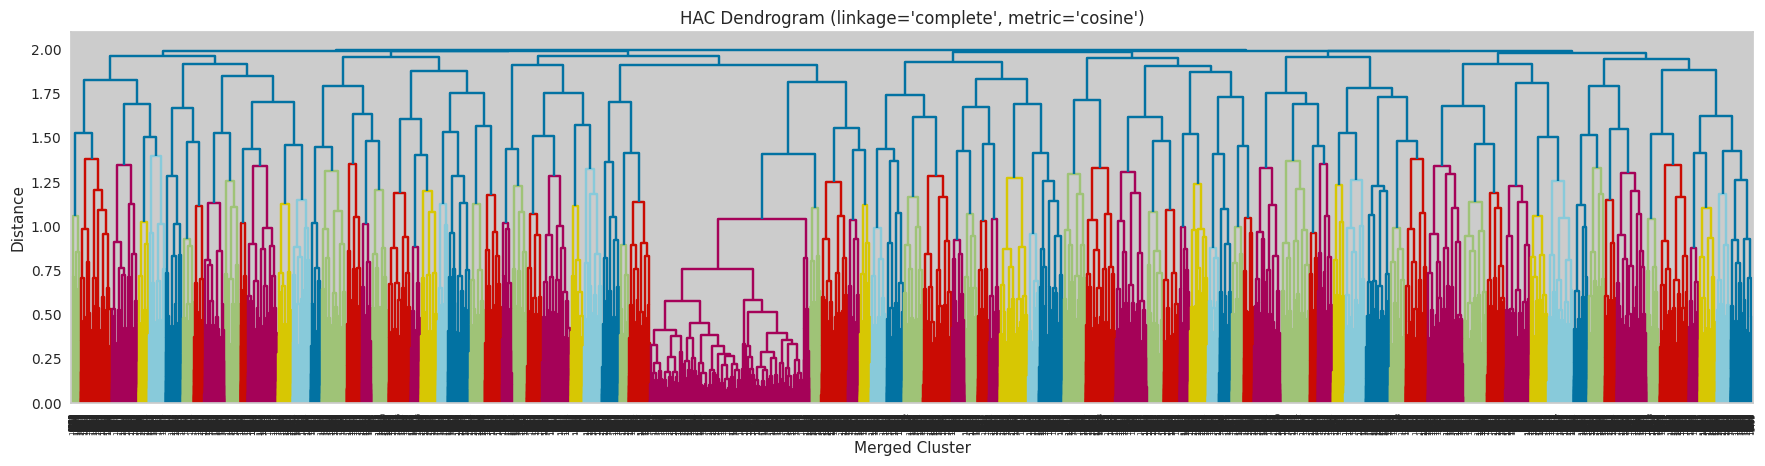


 Running HAC with: n_clusters=2, linkage=average, metric=cosine


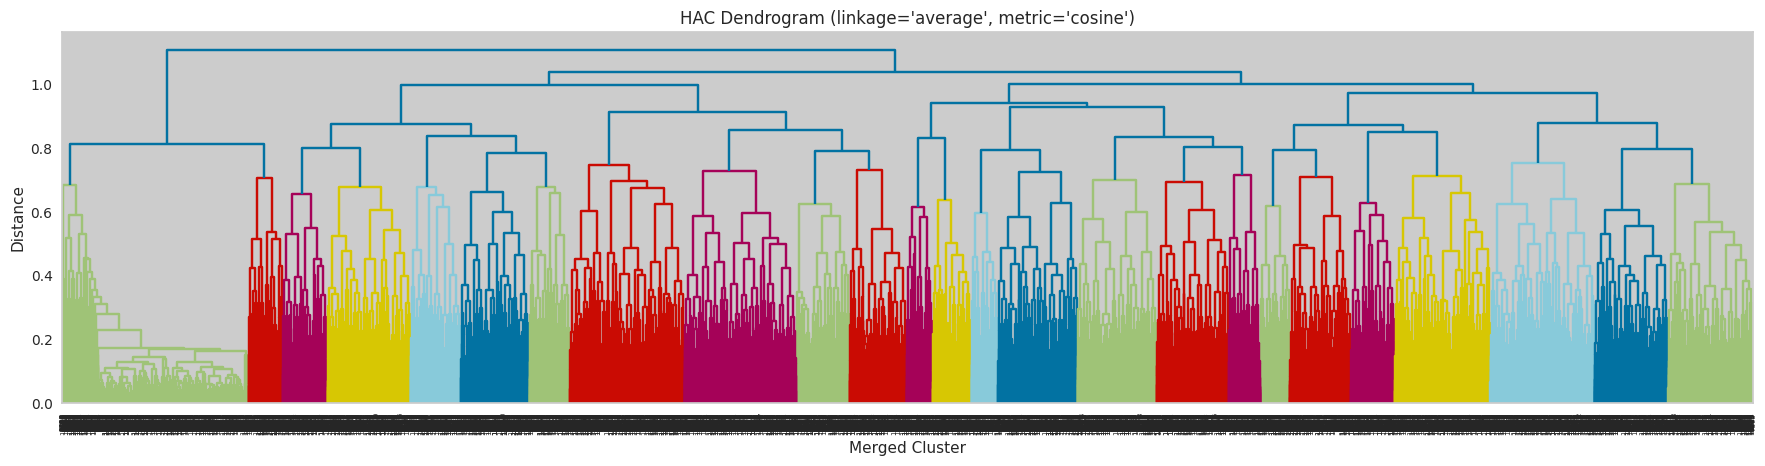


 Running HAC with: n_clusters=2, linkage=complete, metric=cosine


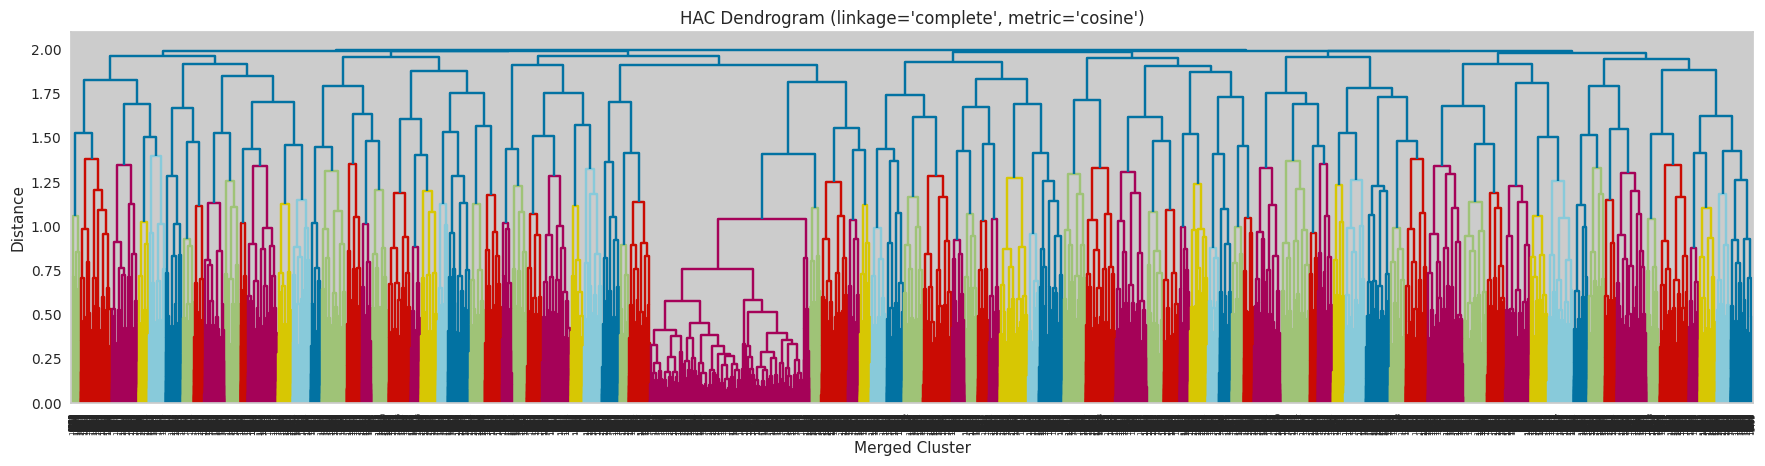


 Running HAC with: n_clusters=3, linkage=average, metric=cosine


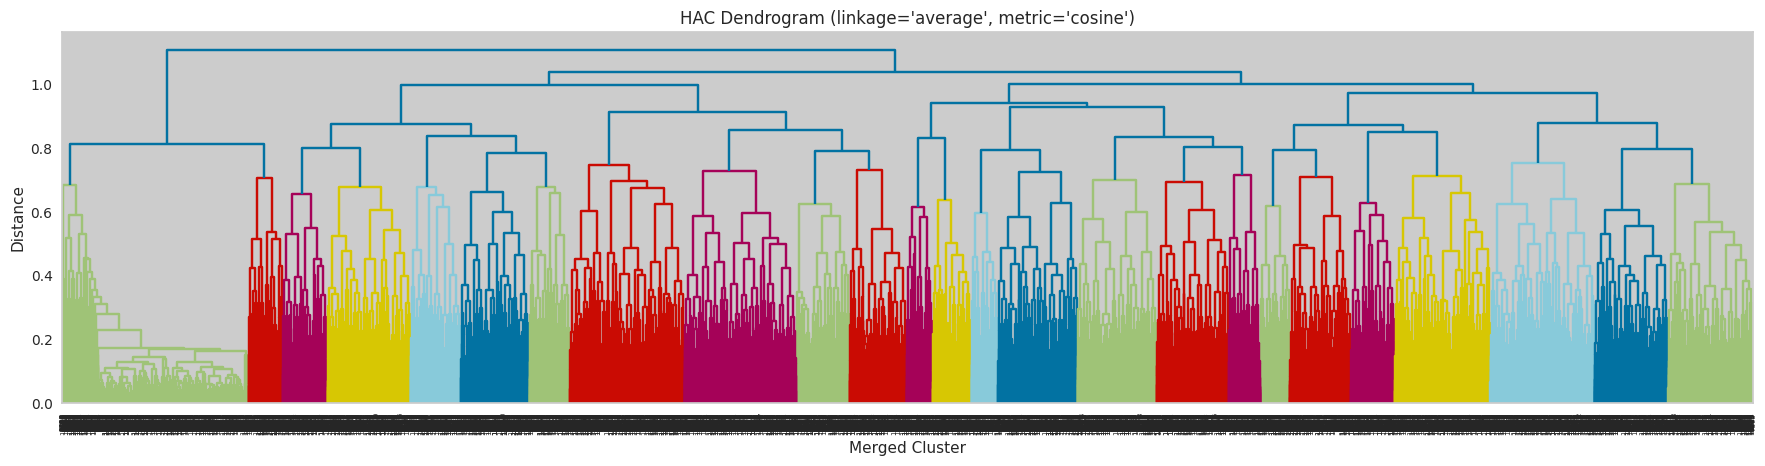


 Running HAC with: n_clusters=3, linkage=complete, metric=cosine


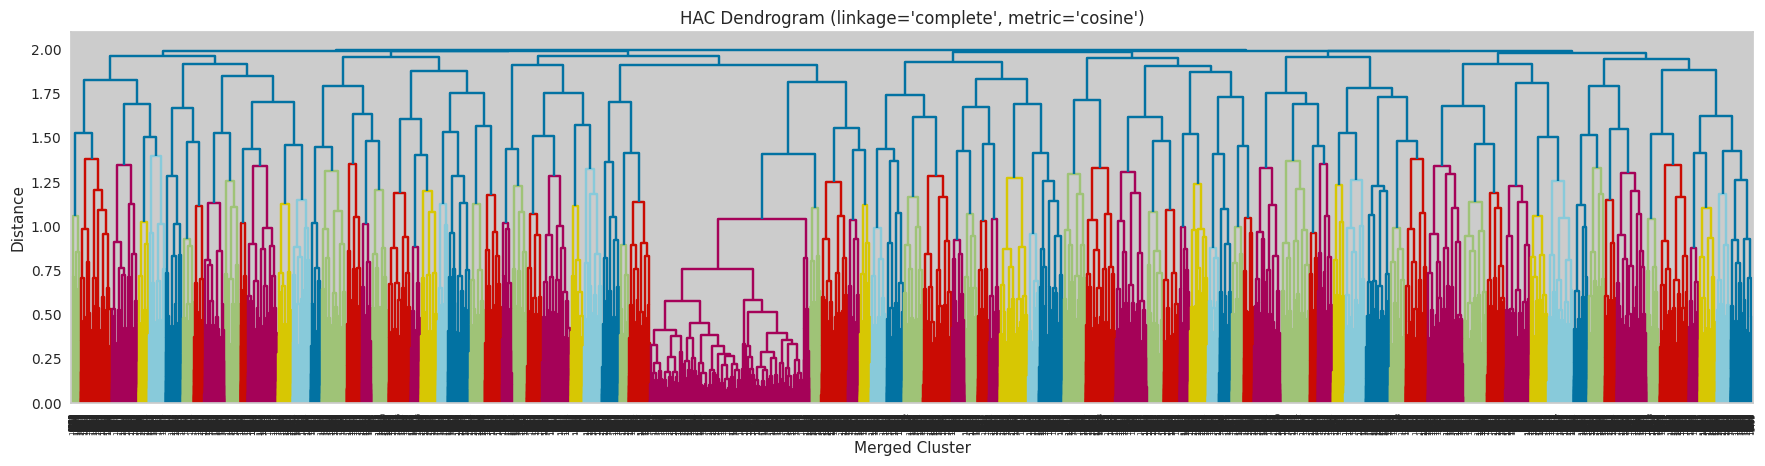

In [71]:
affinities = ['cosine']
linkages = ['average', 'complete']  
n_clusters_list = [1, 2, 3]

results = {}

for n_clusters in n_clusters_list:
    for affinity in affinities:
        for linkage_method in linkages:

            print(f"\n Running HAC with: n_clusters={n_clusters}, linkage={linkage_method}, metric={affinity}")

            try:
                labels = cluster_and_draw(
                    df=data_pca,
                    n_clusters=n_clusters,
                    affinity=affinity,
                    linkage_method=linkage_method
                )
                
                key = f"{n_clusters}_{linkage_method}_{affinity}"
                results[key] = labels

            except Exception as e:
                print(f"Error with {linkage_method} + {affinity}: {e}")

## Explore the dense core group

- As identified by Ward linkage
- And seen in other clustering algorithms before

In [72]:
ward_model = cluster.AgglomerativeClustering(
    n_clusters=2,
    linkage='ward',
    metric='euclidean'
)
labels = ward_model.fit_predict(data)

data_labels = data.copy() 
data_labels['cluster'] = labels

cluster_means = data_labels.groupby('cluster').mean()

In [73]:
#cluster 0 = large and broad cluster
#cluster 1 = small and dense cluster
cluster_means

Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
cluster                                                                        
0           0.171838                      0.098767                 -0.113018   
1          -1.720271                     -0.988762                  1.131426   

         Alcohol Consumption (drinks/week)  Stress Level (1-10)  \
cluster                                                           
0                                -0.037962            -0.108886   
1                                 0.380041             1.090061   

         Heart Rate (bpm)  Breathing Rate (breaths/min)  Sweating Level (1-5)  \
cluster                                                                         
0               -0.079980                     -0.069092             -0.066724   
1                0.800683                      0.691680              0.667979   

         Therapy Sessions (per month)  Diet Quality (1-10)  
cluster                                                     
0                           -0.189427             0.091546  
1                            1.896352            -0.916472

- Cluster 1 represents a smaller, more homogenous group with elevated stress levels, higher physiological arousal, and poorer lifestyle habits.
- This group also engages in more therapy, suggesting a higher level of mental health concern.
- Cluster 0 is a broader, more heterogeneous group with moderate levels of stress and healthier behaviors.
The clustering reflects a core group of higher-risk individuals within a wider, more typical population.